### Çok değişkenli normal dağılım

#### 5 SÜREKLİ DEĞİŞKEN

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error

def simulate_scenario(sample_size, p):
    
    # y değerlerini oluştur (0 ve 1 etiketleri)
    bernoulli_data = np.random.binomial(n=1, p=p, size=sample_size)
    y_y1 = bernoulli_data[bernoulli_data==1]
    y_y0 = bernoulli_data[bernoulli_data==0]

    # Kovaryans matrisi
    cov_matrix = [
        [1.0, 0.2, 0.6, 0.6, 0.4],
        [0.2, 1.0, 0.6, 0.6, 0.6],
        [0.6, 0.6, 1.0, 0.6, 0.6],
        [0.6, 0.6, 0.6, 1.0, 0.2],
        [0.4, 0.6, 0.6, 0.2, 1.0]
    ]
    
    # Ortalamalar (5 değişken için)
    mean_y0 = [3, 3, 3, 3, 3]  # y = 0 için ortalama
    mean_y1 = [5, 5, 5, 5, 5]  # y = 1 için ortalama
    
    n_samples_y0=len(y_y0)
    n_samples_y1=len(y_y1)

    # y = 0 ve y = 1 için örnek üretimi
    X_y0 = np.random.multivariate_normal(mean_y0, cov_matrix, n_samples_y0)
    X_y1 = np.random.multivariate_normal(mean_y1, cov_matrix, n_samples_y1)

    

    # X ve y'yi birleştir
    X_main = np.vstack((X_y0, X_y1))  # X değerlerini birleştir
    y = np.hstack((y_y0, y_y1))  # y etiketlerini birleştir

    # Gürültü değişkenleri için birim kovaryans matrisi (5 gürültü değişkeni)
    noise_cov_matrix = np.eye(5)  # Diagonal, yani bağımsız gürültü değişkenleri

    # Gürültü değişkenlerini oluşturun
    X_y0_noise = np.random.multivariate_normal(mean=np.zeros(5), cov=noise_cov_matrix, size=n_samples_y0)
    X_y1_noise = np.random.multivariate_normal(mean=np.zeros(5), cov=noise_cov_matrix, size=n_samples_y1)

    # Ana değişkenler ve gürültü değişkenlerini toplayarak gürültü ekleyin
    X_noise_main = np.vstack((X_y0_noise, X_y1_noise))
    X = X_main + X_noise_main  # Gürültü eklenmiş X

    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # ML modelleri
    models = {
        "Logistic Regression": LogisticRegression(max_iter=500, solver='lbfgs'),
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto'),
        "Decision Tree": DecisionTreeClassifier(max_depth=5),
        "SVM": SVC(kernel='rbf', probability=True, C=1.0, gamma='scale'),
        "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1),
        "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0,algorithm="SAMME"),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3), 
        "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results[name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "auc": auc,
            "mse": mse
        }

    return results, X, y, X_y0, X_y1

# Simülasyon sonuçlarını toplamak için
results1 = []

for p in [0.5, 0.3, 0.2]:
    aggregated_results = {model: {"accuracy": [], "precision": [], "recall": [], "f1": [], "auc": [], "mse": []}
                          for model in ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "SVM", "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost"]}

    for i in range(1000):  # 1000 tekrar
        scenario_results,X, y, X_y0, X_y1 = simulate_scenario(sample_size=1000,p=p)  # Sonuçları al

        for model, metrics in scenario_results.items():
            for metric, value in metrics.items():
                aggregated_results[model][metric].append(value)

    avg_results = {model: {metric: np.mean(values) for metric, values in metrics.items()}
                   for model, metrics in aggregated_results.items()}

    results1.append((p, avg_results))

# Sonuçları yazdırma
for p, avg_results in results1:
    print(f'\n--- Scenario with p={p} ---')
    for model, metrics in avg_results.items():
        print(f'\nModel: {model}')
        for metric, value in metrics.items():
            print(f'   {metric.capitalize():<10}: {value:.4f}')



--- Scenario with p=0.5 ---

Model: Logistic Regression
   Accuracy  : 0.8663
   Precision : 0.8678
   Recall    : 0.8661
   F1        : 0.8663
   Auc       : 0.9424
   Mse       : 0.1337

Model: Naive Bayes
   Accuracy  : 0.8672
   Precision : 0.8683
   Recall    : 0.8673
   F1        : 0.8672
   Auc       : 0.9425
   Mse       : 0.1328

Model: K-Nearest Neighbors
   Accuracy  : 0.8471
   Precision : 0.8483
   Recall    : 0.8474
   F1        : 0.8471
   Auc       : 0.9113
   Mse       : 0.1529

Model: Decision Tree
   Accuracy  : 0.8275
   Precision : 0.8323
   Recall    : 0.8236
   F1        : 0.8266
   Auc       : 0.8716
   Mse       : 0.1725

Model: SVM
   Accuracy  : 0.8647
   Precision : 0.8667
   Recall    : 0.8640
   F1        : 0.8646
   Auc       : 0.9255
   Mse       : 0.1353

Model: Random Forest
   Accuracy  : 0.8545
   Precision : 0.8564
   Recall    : 0.8539
   F1        : 0.8544
   Auc       : 0.9288
   Mse       : 0.1455

Model: AdaBoost
   Accuracy  : 0.8502
   Preci

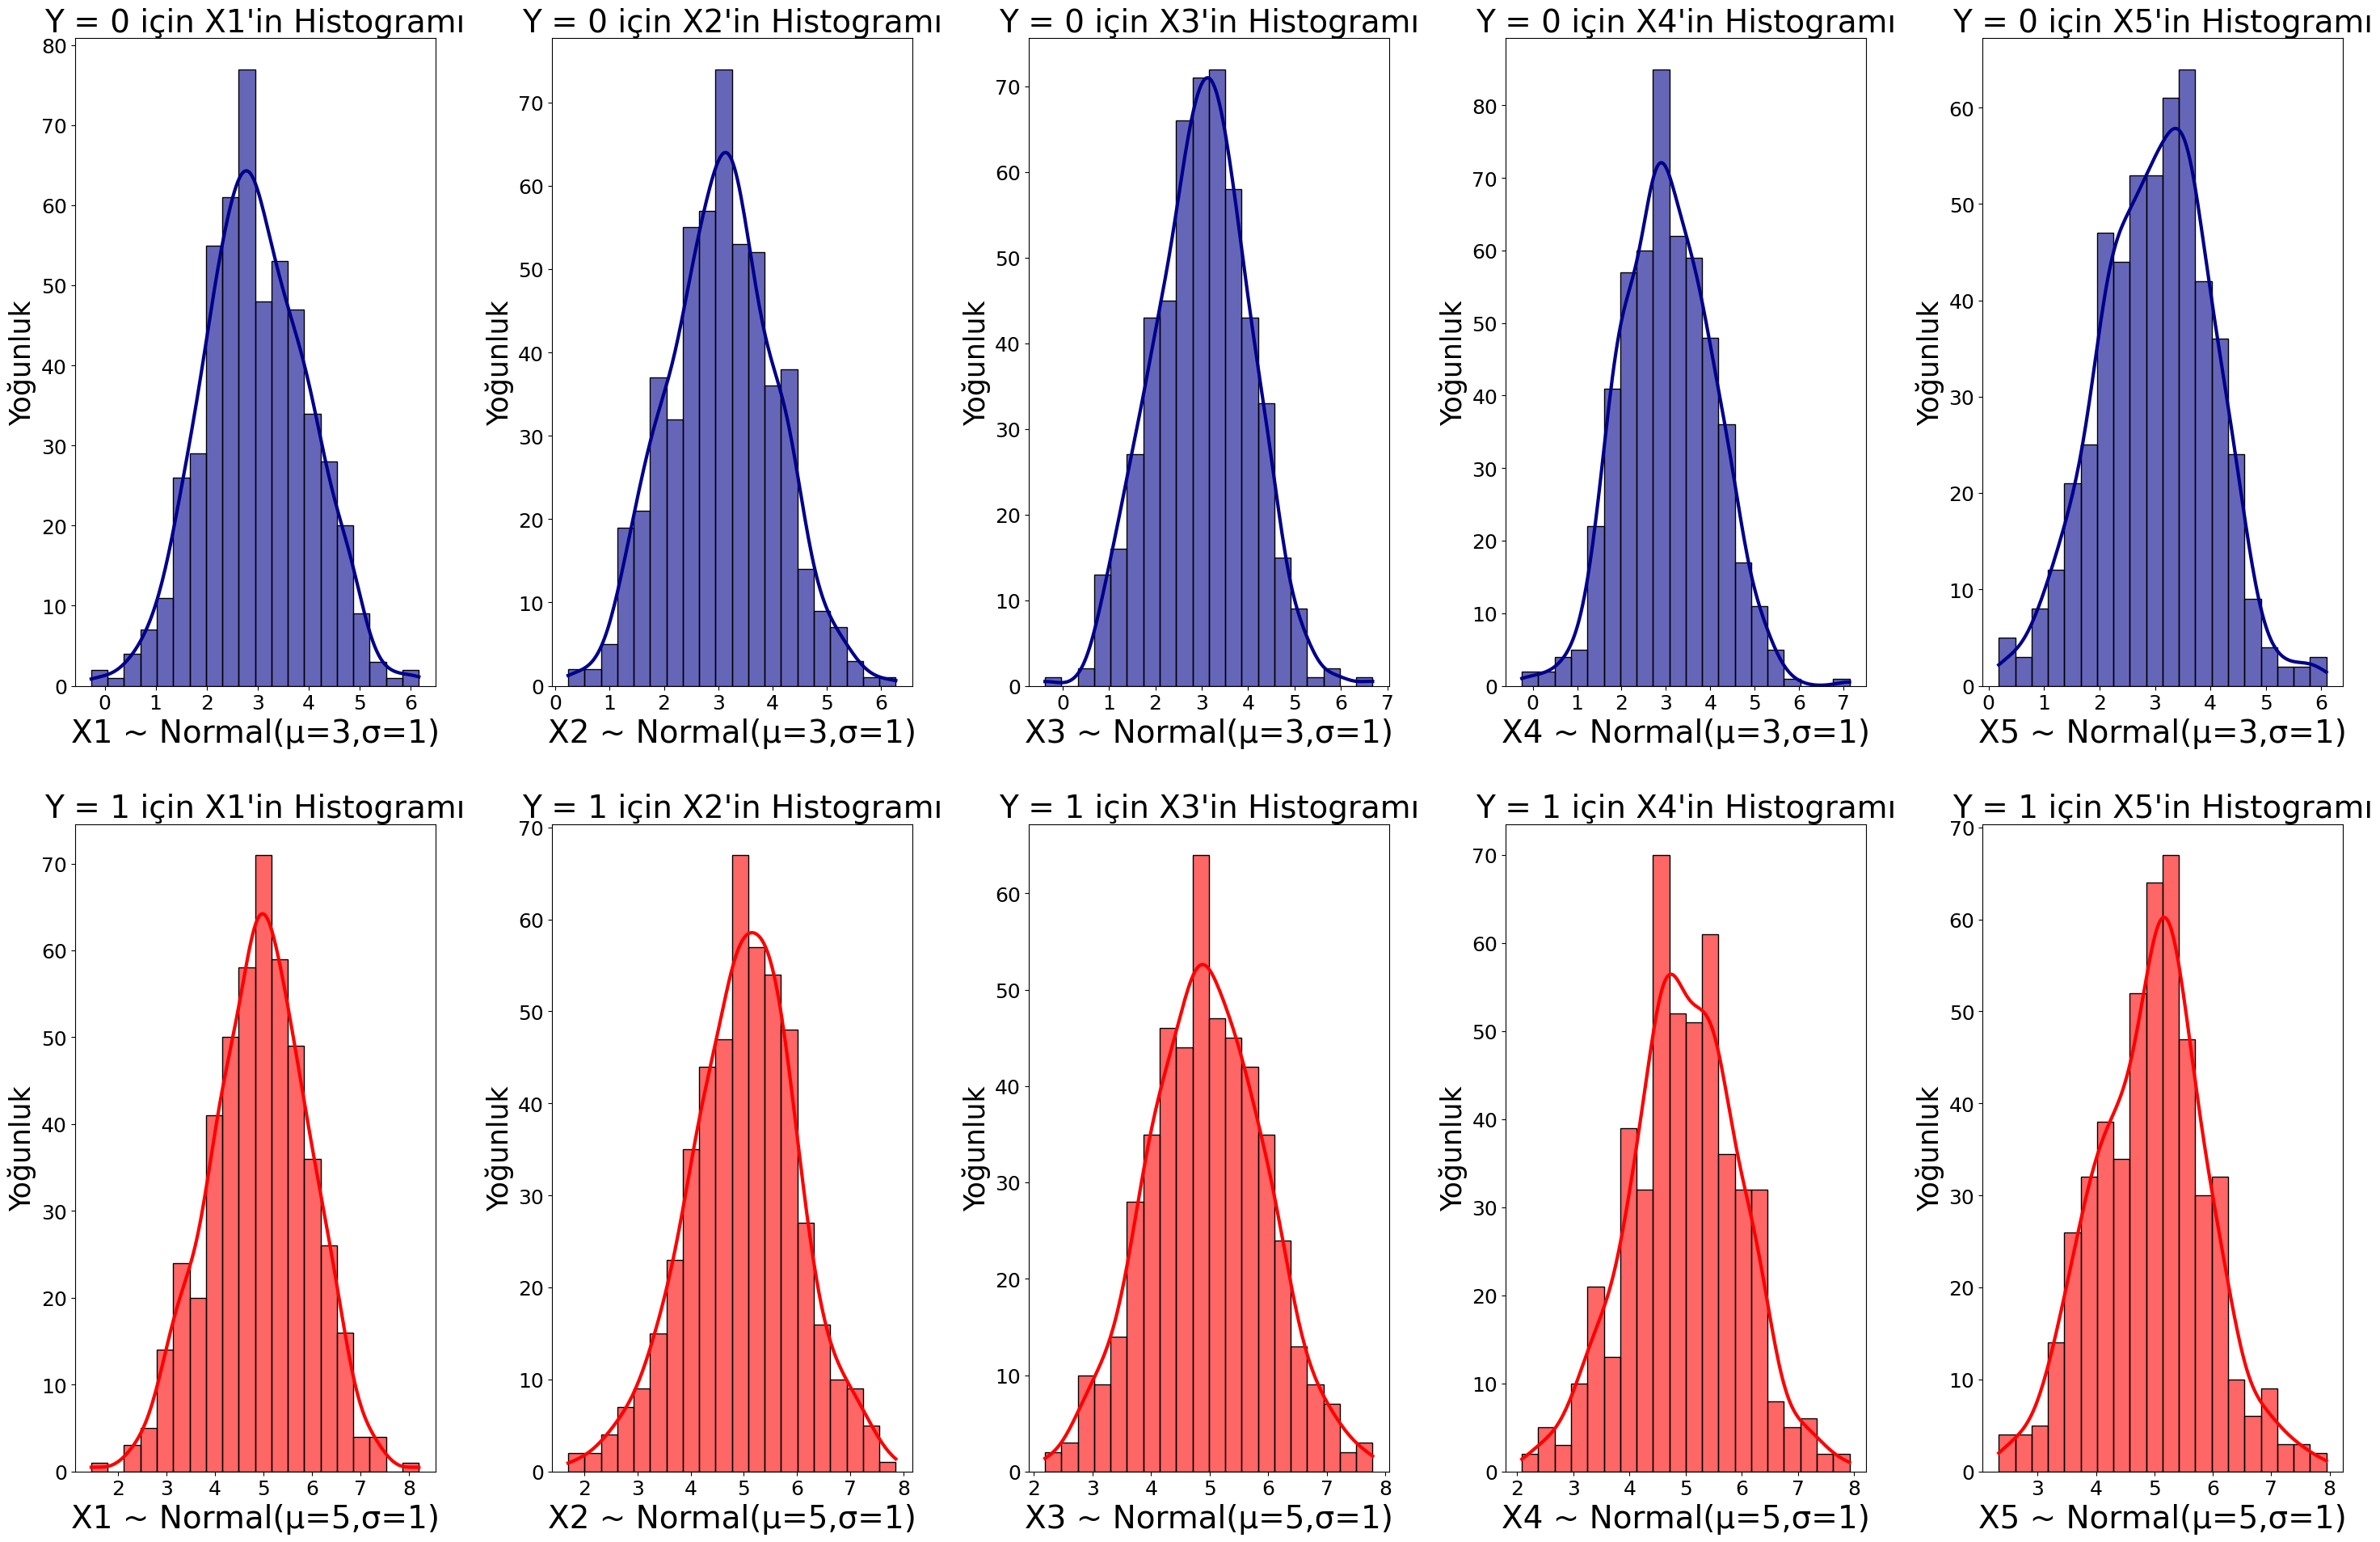

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

p = 0.5

results, X, y, X_y0, X_y1 = simulate_scenario(sample_size=1000, p=p)

# Grafik boyutunu ayarla
plt.figure(figsize=(30, 20))
    
# Y0'dan üretilen 5 değişkenin histogramları
for i in range(5):
    plt.subplot(2, 5, i + 1)
    sns.histplot(X_y0[:, i], bins=20, kde=True, color='darkblue', edgecolor="black", alpha=0.6, line_kws={'linewidth': 3})
    plt.title(f'Y = 0 için X{i+1}\'in Histogramı', fontsize=28)  
    plt.xlabel(f"X{i+1} ~ Normal(μ=3,σ=1)", fontsize=28)    
    plt.ylabel('Yoğunluk', fontsize=25)  
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
# Y1'den üretilen 5 değişkenin histogramları
for i in range(5):
    plt.subplot(2, 5, 5 + i + 1)
    sns.histplot(X_y1[:, i], bins=20, kde=True, color='red', edgecolor="black", alpha=0.6, line_kws={'linewidth': 3})
    plt.title(f'Y = 1 için X{i+1}\'in Histogramı', fontsize=28) 
    plt.xlabel(f"X{i+1} ~ Normal(μ=5,σ=1)", fontsize=28)    
    plt.ylabel('Yoğunluk', fontsize=25)  
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
plt.tight_layout(pad=4) 
plt.show()

#### 5 DEĞİŞKEN (2 KATEGORİK+3 SÜREKLİ)

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error

def simulate_scenario(sample_size, p):
    
    # y değerlerini oluştur (0 ve 1 etiketleri)
    bernoulli_data = np.random.binomial(n=1, p=p, size=sample_size)
    y_y1 = bernoulli_data[bernoulli_data==1]
    y_y0 = bernoulli_data[bernoulli_data==0]

    # Kovaryans matrisi
    cov_matrix = [
        [1.0, 0.2, 0.6, 0.6, 0.4],
        [0.2, 1.0, 0.6, 0.6, 0.6],
        [0.6, 0.6, 1.0, 0.6, 0.6],
        [0.6, 0.6, 0.6, 1.0, 0.2],
        [0.4, 0.6, 0.6, 0.2, 1.0]
    ]
    
    # Ortalamalar (5 değişken için)
    mean_y0 = [3, 3, 3, 3, 3]  # y = 0 için ortalama
    mean_y1 = [5, 5, 5, 5, 5]  # y = 1 için ortalama
    
    n_samples_y0=len(y_y0)
    n_samples_y1=len(y_y1)

    # y = 0 ve y = 1 için örnek üretimi
    X_y0 = np.random.multivariate_normal(mean_y0, cov_matrix, n_samples_y0)
    X_y1 = np.random.multivariate_normal(mean_y1, cov_matrix, n_samples_y1)

    

    # X ve y'yi birleştir
    X_main = np.vstack((X_y0, X_y1))  # X değerlerini birleştir
    y = np.hstack((y_y0, y_y1))  # y etiketlerini birleştir

    # Gürültü değişkenleri için birim kovaryans matrisi (5 gürültü değişkeni)
    noise_cov_matrix = np.eye(5)  # Diagonal, yani bağımsız gürültü değişkenleri

    # Gürültü değişkenlerini oluşturun
    X_y0_noise = np.random.multivariate_normal(mean=np.zeros(5), cov=noise_cov_matrix, size=n_samples_y0)
    X_y1_noise = np.random.multivariate_normal(mean=np.zeros(5), cov=noise_cov_matrix, size=n_samples_y1)

    # Ana değişkenler ve gürültü değişkenlerini toplayarak gürültü ekleyin
    X_noise_main = np.vstack((X_y0_noise, X_y1_noise))
    X = X_main + X_noise_main  # Gürültü eklenmiş X


    # Sürekli değişkenlerden 2'sini kategorik hale getirme
    Q3_x1 = np.percentile(X[:, 0], 75)  # x1 için üçüncü çeyrek
    Q2_x2 = np.percentile(X[:, 1], 50)  # x2 için medyan

    x1_categorical = (X[:, 0] > Q3_x1).astype(int)  # x1: üçüncü çeyrekten büyükse 1, değilse 0
    x2_categorical = (X[:, 1] > Q2_x2).astype(int)  # x2: medyandan büyükse 1, değilse 0

    # Sürekli ve kategorik değişkenleri birleştir
    X_continuous = X[:, 2:5]  # Sürekli değişkenlerden 3'ünü al
    X = np.column_stack((x1_categorical, x2_categorical, X_continuous))  # 3 sürekli + 2 kategorik
    

    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # ML modelleri
    models = {
        "Logistic Regression": LogisticRegression(max_iter=500, solver='lbfgs'),
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto'),
        "Decision Tree": DecisionTreeClassifier(max_depth=5),
        "SVM": SVC(kernel='rbf', probability=True, C=1.0, gamma='scale'),
        "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1),
        "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0,algorithm="SAMME"),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3), 
        "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results[name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "auc": auc,
            "mse": mse
        }

    return results, X, y, X_y0, X_y1

# Simülasyon sonuçlarını toplamak için
results1 = []

for p in [0.5, 0.3, 0.2]:
    aggregated_results = {model: {"accuracy": [], "precision": [], "recall": [], "f1": [], "auc": [], "mse": []}
                          for model in ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "SVM", "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost"]}

    for i in range(1000):  # 1000 tekrar
        scenario_results,X, y, X_y0, X_y1 = simulate_scenario(sample_size=1000,p=p)  # Sonuçları al

        for model, metrics in scenario_results.items():
            for metric, value in metrics.items():
                aggregated_results[model][metric].append(value)

    avg_results = {model: {metric: np.mean(values) for metric, values in metrics.items()}
                   for model, metrics in aggregated_results.items()}

    results1.append((p, avg_results))

# Sonuçları yazdırma
for p, avg_results in results1:
    print(f'\n--- Scenario with p={p} ---')
    for model, metrics in avg_results.items():
        print(f'\nModel: {model}')
        for metric, value in metrics.items():
            print(f'   {metric.capitalize():<10}: {value:.4f}')



--- Scenario with p=0.5 ---

Model: Logistic Regression
   Accuracy  : 0.8585
   Precision : 0.8612
   Recall    : 0.8555
   F1        : 0.8576
   Auc       : 0.9345
   Mse       : 0.1415

Model: Naive Bayes
   Accuracy  : 0.8490
   Precision : 0.8591
   Recall    : 0.8353
   F1        : 0.8463
   Auc       : 0.9252
   Mse       : 0.1510

Model: K-Nearest Neighbors
   Accuracy  : 0.8340
   Precision : 0.8398
   Recall    : 0.8264
   F1        : 0.8322
   Auc       : 0.8999
   Mse       : 0.1660

Model: Decision Tree
   Accuracy  : 0.8202
   Precision : 0.8265
   Recall    : 0.8133
   F1        : 0.8182
   Auc       : 0.8741
   Mse       : 0.1798

Model: SVM
   Accuracy  : 0.8557
   Precision : 0.8583
   Recall    : 0.8530
   F1        : 0.8548
   Auc       : 0.9295
   Mse       : 0.1443

Model: Random Forest
   Accuracy  : 0.8421
   Precision : 0.8435
   Recall    : 0.8411
   F1        : 0.8414
   Auc       : 0.9177
   Mse       : 0.1579

Model: AdaBoost
   Accuracy  : 0.8444
   Preci

#### 10 SÜREKLİ DEĞİŞKEN 

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error


# Kovaryans matrisini pozitif yarı tanımlı yapacak fonksiyon
def make_positive_semidefinite(matrix):
    # Özdeğerleri ve vektörleri hesapla
    eigvals, eigvecs = np.linalg.eigh(matrix)
    # Negatif özdeğerleri sıfırla (veya küçük bir pozitif değere ayarla)
    eigvals[eigvals < 0] = 0
    # Düzeltilmiş kovaryans matrisini yeniden oluştur
    return eigvecs @ np.diag(eigvals) @ eigvecs.T


def simulate_scenario(sample_size, p):
    
    # y değerlerini oluştur (0 ve 1 etiketleri)
    bernoulli_data = np.random.binomial(n=1, p=p, size=sample_size)
    y_y1 = bernoulli_data[bernoulli_data==1]
    y_y0 = bernoulli_data[bernoulli_data==0]

    # Kovaryans matrisi (10 değişken için)
    cov_matrix = [
       [1.0, 0.2, 0.6, 0.6, 0.4, 0.2, 0.2, 0.6, 0.6, 0.4],
       [0.2, 1.0, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6],
       [0.6, 0.6, 1.0, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6],
       [0.6, 0.6, 0.6, 1.0, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2],
       [0.4, 0.6, 0.6, 0.2, 1.0, 0.4, 0.6, 0.6, 0.2, 0.4],
       [0.2, 0.2, 0.6, 0.6, 0.4, 1.0, 0.2, 0.6, 0.6, 0.4],
       [0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 1.0, 0.6, 0.6, 0.6],
       [0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 1.0, 0.6, 0.6],
       [0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 1.0, 0.2],
       [0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 1.0]
    ]


    # Kovaryans matrisini pozitif yarı tanımlı hale getir
    cov_matrix = make_positive_semidefinite(np.array(cov_matrix))

    
    # Ortalamalar (10 değişken için)
    mean_y0 = [3]*10  # y = 0 için ortalama
    mean_y1 = [5]*10  # y = 1 için ortalama
    
    n_samples_y0=len(y_y0)
    n_samples_y1=len(y_y1)

    # y = 0 ve y = 1 için örnek üretimi
    X_y0 = np.random.multivariate_normal(mean_y0, cov_matrix, n_samples_y0)
    X_y1 = np.random.multivariate_normal(mean_y1, cov_matrix, n_samples_y1)

    

    # X ve y'yi birleştir
    X_main = np.vstack((X_y0, X_y1))  # X değerlerini birleştir
    y = np.hstack((y_y0, y_y1))  # y etiketlerini birleştir

    # Gürültü değişkenleri için birim kovaryans matrisi (10 gürültü değişkeni)
    noise_cov_matrix = np.eye(10)  # Diagonal, yani bağımsız gürültü değişkenleri

    # Gürültü değişkenlerini oluşturun
    X_y0_noise = np.random.multivariate_normal(mean=np.zeros(10), cov=noise_cov_matrix, size=n_samples_y0)
    X_y1_noise = np.random.multivariate_normal(mean=np.zeros(10), cov=noise_cov_matrix, size=n_samples_y1)

    # Ana değişkenler ve gürültü değişkenlerini toplayarak gürültü ekleyin
    X_noise_main = np.vstack((X_y0_noise, X_y1_noise))
    X = X_main + X_noise_main  # Gürültü eklenmiş X

    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # ML modelleri
    models = {
        "Logistic Regression": LogisticRegression(max_iter=500, solver='lbfgs'),
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto'),
        "Decision Tree": DecisionTreeClassifier(max_depth=5),
        "SVM": SVC(kernel='rbf', probability=True, C=1.0, gamma='scale'),
        "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1),
        "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0,algorithm="SAMME"),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3), 
        "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results[name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "auc": auc,
            "mse": mse
        }

    return results, X, y, X_y0, X_y1

# Simülasyon sonuçlarını toplamak için
results1 = []

for p in [0.5, 0.3, 0.2]:
    aggregated_results = {model: {"accuracy": [], "precision": [], "recall": [], "f1": [], "auc": [], "mse": []}
                          for model in ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "SVM", "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost"]}

    for i in range(1000):  # 1000 tekrar
        scenario_results,X, y, X_y0, X_y1 = simulate_scenario(sample_size=1000,p=p)  # Sonuçları al

        for model, metrics in scenario_results.items():
            for metric, value in metrics.items():
                aggregated_results[model][metric].append(value)

    avg_results = {model: {metric: np.mean(values) for metric, values in metrics.items()}
                   for model, metrics in aggregated_results.items()}

    results1.append((p, avg_results))

# Sonuçları yazdırma
for p, avg_results in results1:
    print(f'\n--- Scenario with p={p} ---')
    for model, metrics in avg_results.items():
        print(f'\nModel: {model}')
        for metric, value in metrics.items():
            print(f'   {metric.capitalize():<10}: {value:.4f}')



--- Scenario with p=0.5 ---

Model: Logistic Regression
   Accuracy  : 0.8959
   Precision : 0.8965
   Recall    : 0.8949
   F1        : 0.8951
   Auc       : 0.9626
   Mse       : 0.1041

Model: Naive Bayes
   Accuracy  : 0.8948
   Precision : 0.8955
   Recall    : 0.8936
   F1        : 0.8940
   Auc       : 0.9617
   Mse       : 0.1052

Model: K-Nearest Neighbors
   Accuracy  : 0.8803
   Precision : 0.8809
   Recall    : 0.8794
   F1        : 0.8795
   Auc       : 0.9377
   Mse       : 0.1197

Model: Decision Tree
   Accuracy  : 0.8374
   Precision : 0.8405
   Recall    : 0.8332
   F1        : 0.8357
   Auc       : 0.8628
   Mse       : 0.1626

Model: SVM
   Accuracy  : 0.8943
   Precision : 0.8949
   Recall    : 0.8934
   F1        : 0.8935
   Auc       : 0.9518
   Mse       : 0.1057

Model: Random Forest
   Accuracy  : 0.8875
   Precision : 0.8887
   Recall    : 0.8858
   F1        : 0.8866
   Auc       : 0.9541
   Mse       : 0.1125

Model: AdaBoost
   Accuracy  : 0.8784
   Preci

#### 10 DEĞİŞKEN (5 KATEGORİK+5 SÜREKLİ)

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error


# Kovaryans matrisini pozitif yarı tanımlı yapacak fonksiyon
def make_positive_semidefinite(matrix):
    # Özdeğerleri ve vektörleri hesapla
    eigvals, eigvecs = np.linalg.eigh(matrix)
    # Negatif özdeğerleri sıfırla (veya küçük bir pozitif değere ayarla)
    eigvals[eigvals < 0] = 0
    # Düzeltilmiş kovaryans matrisini yeniden oluştur
    return eigvecs @ np.diag(eigvals) @ eigvecs.T


def simulate_scenario(sample_size, p):
    
    # y değerlerini oluştur (0 ve 1 etiketleri)
    bernoulli_data = np.random.binomial(n=1, p=p, size=sample_size)
    y_y1 = bernoulli_data[bernoulli_data==1]
    y_y0 = bernoulli_data[bernoulli_data==0]

    # Kovaryans matrisi (10 değişken için)
    cov_matrix = [
       [1.0, 0.2, 0.6, 0.6, 0.4, 0.2, 0.2, 0.6, 0.6, 0.4],
       [0.2, 1.0, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6],
       [0.6, 0.6, 1.0, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6],
       [0.6, 0.6, 0.6, 1.0, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2],
       [0.4, 0.6, 0.6, 0.2, 1.0, 0.4, 0.6, 0.6, 0.2, 0.4],
       [0.2, 0.2, 0.6, 0.6, 0.4, 1.0, 0.2, 0.6, 0.6, 0.4],
       [0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 1.0, 0.6, 0.6, 0.6],
       [0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 1.0, 0.6, 0.6],
       [0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 1.0, 0.2],
       [0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 1.0]
    ]


    # Kovaryans matrisini pozitif yarı tanımlı hale getir
    cov_matrix = make_positive_semidefinite(np.array(cov_matrix))

    
    # Ortalamalar (10 değişken için)
    mean_y0 = [3]*10  # y = 0 için ortalama
    mean_y1 = [5]*10  # y = 1 için ortalama
    
    n_samples_y0=len(y_y0)
    n_samples_y1=len(y_y1)

    # y = 0 ve y = 1 için örnek üretimi
    X_y0 = np.random.multivariate_normal(mean_y0, cov_matrix, n_samples_y0)
    X_y1 = np.random.multivariate_normal(mean_y1, cov_matrix, n_samples_y1)

    

    # X ve y'yi birleştir
    X_main = np.vstack((X_y0, X_y1))  # X değerlerini birleştir
    y = np.hstack((y_y0, y_y1))  # y etiketlerini birleştir

    # Gürültü değişkenleri için birim kovaryans matrisi (10 gürültü değişkeni)
    noise_cov_matrix = np.eye(10)  # Diagonal, yani bağımsız gürültü değişkenleri

    # Gürültü değişkenlerini oluşturun
    X_y0_noise = np.random.multivariate_normal(mean=np.zeros(10), cov=noise_cov_matrix, size=n_samples_y0)
    X_y1_noise = np.random.multivariate_normal(mean=np.zeros(10), cov=noise_cov_matrix, size=n_samples_y1)

    # Ana değişkenler ve gürültü değişkenlerini toplayarak gürültü ekleyin
    X_noise_main = np.vstack((X_y0_noise, X_y1_noise))
    X = X_main + X_noise_main  # Gürültü eklenmiş X


    
    # Sürekli değişkenlerden 5'ini kategorik hale getirme
    # Q3 ve Q2 değerlerini hesapla
    Q3_x1 = np.percentile(X[:, 0], 75)  # x1 için %75 (üçüncü çeyrek)
    Q2_x2 = np.percentile(X[:, 1], 50)  # x2 için %50 (medyan)
    Q3_x3 = np.percentile(X[:, 2], 75)  # x3 için %75 (üçüncü çeyrek)
    Q2_x4 = np.percentile(X[:, 3], 50)  # x4 için %50 (medyan)
    Q3_x5 = np.percentile(X[:, 4], 75)  # x5 için %75 (üçüncü çeyrek)

    # Kategorik hale getirme
    x1_categorical = (X[:, 0] > Q3_x1).astype(int)  # x1: Q3'ten büyükse 1, değilse 0
    x2_categorical = (X[:, 1] > Q2_x2).astype(int)  # x2: Q2'den büyükse 1, değilse 0
    x3_categorical = (X[:, 2] > Q3_x3).astype(int)  # x3: Q3'ten büyükse 1, değilse 0
    x4_categorical = (X[:, 3] > Q2_x4).astype(int)  # x4: Q2'den büyükse 1, değilse 0
    x5_categorical = (X[:, 4] > Q3_x5).astype(int)  # x5: Q3'ten büyükse 1, değilse 0

    # Sürekli ve kategorik değişkenleri birleştir
    X_continuous = X[:, 5:10]  # Sürekli değişkenlerden 5'ini al
    X = np.column_stack((x1_categorical, x2_categorical, x3_categorical, x4_categorical, x5_categorical, X_continuous))  # 5 sürekli + 5 kategorik


    
    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # ML modelleri
    models = {
        "Logistic Regression": LogisticRegression(max_iter=500, solver='lbfgs'),
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto'),
        "Decision Tree": DecisionTreeClassifier(max_depth=5),
        "SVM": SVC(kernel='rbf', probability=True, C=1.0, gamma='scale'),
        "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1),
        "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0,algorithm="SAMME"),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3), 
        "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results[name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "auc": auc,
            "mse": mse
        }

    return results, X, y, X_y0, X_y1

# Simülasyon sonuçlarını toplamak için
results1 = []

for p in [0.5, 0.3, 0.2]:
    aggregated_results = {model: {"accuracy": [], "precision": [], "recall": [], "f1": [], "auc": [], "mse": []}
                          for model in ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "SVM", "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost"]}

    for i in range(1000):  # 1000 tekrar
        scenario_results,X, y, X_y0, X_y1 = simulate_scenario(sample_size=1000,p=p)  # Sonuçları al

        for model, metrics in scenario_results.items():
            for metric, value in metrics.items():
                aggregated_results[model][metric].append(value)

    avg_results = {model: {metric: np.mean(values) for metric, values in metrics.items()}
                   for model, metrics in aggregated_results.items()}

    results1.append((p, avg_results))

# Sonuçları yazdırma
for p, avg_results in results1:
    print(f'\n--- Scenario with p={p} ---')
    for model, metrics in avg_results.items():
        print(f'\nModel: {model}')
        for metric, value in metrics.items():
            print(f'   {metric.capitalize():<10}: {value:.4f}')



--- Scenario with p=0.5 ---

Model: Logistic Regression
   Accuracy  : 0.8854
   Precision : 0.8897
   Recall    : 0.8796
   F1        : 0.8840
   Auc       : 0.9553
   Mse       : 0.1146

Model: Naive Bayes
   Accuracy  : 0.8716
   Precision : 0.8739
   Recall    : 0.8681
   F1        : 0.8704
   Auc       : 0.9465
   Mse       : 0.1283

Model: K-Nearest Neighbors
   Accuracy  : 0.8644
   Precision : 0.8782
   Recall    : 0.8456
   F1        : 0.8608
   Auc       : 0.9251
   Mse       : 0.1356

Model: Decision Tree
   Accuracy  : 0.8321
   Precision : 0.8376
   Recall    : 0.8247
   F1        : 0.8297
   Auc       : 0.8738
   Mse       : 0.1679

Model: SVM
   Accuracy  : 0.8828
   Precision : 0.8862
   Recall    : 0.8780
   F1        : 0.8815
   Auc       : 0.9525
   Mse       : 0.1172

Model: Random Forest
   Accuracy  : 0.8754
   Precision : 0.8771
   Recall    : 0.8729
   F1        : 0.8743
   Auc       : 0.9452
   Mse       : 0.1246

Model: AdaBoost
   Accuracy  : 0.8697
   Preci

#### 20 SÜREKLİ DEĞİŞKEN 

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error


# Kovaryans matrisini pozitif yarı tanımlı yapacak fonksiyon
def make_positive_semidefinite(matrix):
    # Özdeğerleri ve vektörleri hesapla
    eigvals, eigvecs = np.linalg.eigh(matrix)
    # Negatif özdeğerleri sıfırla (veya küçük bir pozitif değere ayarla)
    eigvals[eigvals < 0] = 0
    # Düzeltilmiş kovaryans matrisini yeniden oluştur
    return eigvecs @ np.diag(eigvals) @ eigvecs.T


def simulate_scenario(sample_size, p):
    
    # y değerlerini oluştur (0 ve 1 etiketleri)
    bernoulli_data = np.random.binomial(n=1, p=p, size=sample_size)
    y_y1 = bernoulli_data[bernoulli_data==1]
    y_y0 = bernoulli_data[bernoulli_data==0]

    # Kovaryans matrisi (20 değişken için)
    cov_matrix = [                                    
        [1.0, 0.2, 0.6, 0.6, 0.4, 0.2, 0.2, 0.6, 0.6, 0.4, 0.4, 0.2, 0.6, 0.6, 0.4, 0.2, 0.2, 0.6, 0.6, 0.4],
        [0.2, 1.0, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6],
        [0.6, 0.6, 1.0, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6],
        [0.6, 0.6, 0.6, 1.0, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2],
        [0.4, 0.6, 0.6, 0.2, 1.0, 0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 0.4],
        [0.2, 0.2, 0.6, 0.6, 0.4, 1.0, 0.2, 0.6, 0.6, 0.4, 0.2, 0.2, 0.6, 0.6, 0.4, 0.4, 0.2, 0.6, 0.6, 0.4],
        [0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 1.0, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6],
        [0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 1.0, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6],
        [0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 1.0, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2],
        [0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 1.0, 0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 0.4],
        [0.4, 0.4, 0.2, 0.6, 0.6, 0.4, 0.2, 0.2, 0.6, 0.6, 1.0, 0.4, 0.4, 0.2, 0.6, 0.6, 0.4, 0.2, 0.2, 0.6],  
        [0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 1.0, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6],
        [0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 1.0, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6],
        [0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 1.0, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2],
        [0.4, 0.6, 0.6, 0.2, 1.0, 0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 1.0, 0.4, 0.6, 0.6, 0.2, 0.4],           
        [0.2, 0.2, 0.6, 0.6, 0.4, 0.4, 0.2, 0.6, 0.6, 0.4, 0.2, 0.2, 0.6, 0.6, 0.4, 1.0, 0.2, 0.6, 0.6, 0.4],              
        [0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 1.0, 0.6, 0.6, 0.6],
        [0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 1.0, 0.6, 0.6],
        [0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 1.0, 0.2],
        [0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 1.0]
    ]


    # Kovaryans matrisini pozitif yarı tanımlı hale getir
    cov_matrix = make_positive_semidefinite(np.array(cov_matrix))

    
    # Ortalamalar (20 değişken için)
    mean_y0 = [3]*20  # y = 0 için ortalama
    mean_y1 = [5]*20  # y = 1 için ortalama
    
    n_samples_y0=len(y_y0)
    n_samples_y1=len(y_y1)

    # y = 0 ve y = 1 için örnek üretimi
    X_y0 = np.random.multivariate_normal(mean_y0, cov_matrix, n_samples_y0)
    X_y1 = np.random.multivariate_normal(mean_y1, cov_matrix, n_samples_y1)

    

    # X ve y'yi birleştir
    X_main = np.vstack((X_y0, X_y1))  # X değerlerini birleştir
    y = np.hstack((y_y0, y_y1))  # y etiketlerini birleştir

    # Gürültü değişkenleri için birim kovaryans matrisi (20 gürültü değişkeni)
    noise_cov_matrix = np.eye(20)  # Diagonal, yani bağımsız gürültü değişkenleri

    # Gürültü değişkenlerini oluşturun
    X_y0_noise = np.random.multivariate_normal(mean=np.zeros(20), cov=noise_cov_matrix, size=n_samples_y0)
    X_y1_noise = np.random.multivariate_normal(mean=np.zeros(20), cov=noise_cov_matrix, size=n_samples_y1)

    # Ana değişkenler ve gürültü değişkenlerini toplayarak gürültü ekleyin
    X_noise_main = np.vstack((X_y0_noise, X_y1_noise))
    X = X_main + X_noise_main  # Gürültü eklenmiş X

    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # ML modelleri
    models = {
        "Logistic Regression": LogisticRegression(max_iter=500, solver='lbfgs'),
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto'),
        "Decision Tree": DecisionTreeClassifier(max_depth=5),
        "SVM": SVC(kernel='rbf', probability=True, C=1.0, gamma='scale'),
        "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1),
        "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0,algorithm="SAMME"),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3), 
        "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results[name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "auc": auc,
            "mse": mse
        }

    return results, X, y, X_y0, X_y1

# Simülasyon sonuçlarını toplamak için
results1 = []

for p in [0.5, 0.3, 0.2]:
    aggregated_results = {model: {"accuracy": [], "precision": [], "recall": [], "f1": [], "auc": [], "mse": []}
                          for model in ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "SVM", "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost"]}

    for i in range(1000):  # 1000 tekrar
        scenario_results,X, y, X_y0, X_y1 = simulate_scenario(sample_size=1000,p=p)  # Sonuçları al

        for model, metrics in scenario_results.items():
            for metric, value in metrics.items():
                aggregated_results[model][metric].append(value)

    avg_results = {model: {metric: np.mean(values) for metric, values in metrics.items()}
                   for model, metrics in aggregated_results.items()}

    results1.append((p, avg_results))

# Sonuçları yazdırma
for p, avg_results in results1:
    print(f'\n--- Scenario with p={p} ---')
    for model, metrics in avg_results.items():
        print(f'\nModel: {model}')
        for metric, value in metrics.items():
            print(f'   {metric.capitalize():<10}: {value:.4f}')



--- Scenario with p=0.5 ---

Model: Logistic Regression
   Accuracy  : 0.9090
   Precision : 0.9097
   Recall    : 0.9088
   F1        : 0.9088
   Auc       : 0.9706
   Mse       : 0.0910

Model: Naive Bayes
   Accuracy  : 0.9086
   Precision : 0.9090
   Recall    : 0.9085
   F1        : 0.9083
   Auc       : 0.9704
   Mse       : 0.0914

Model: K-Nearest Neighbors
   Accuracy  : 0.8966
   Precision : 0.8965
   Recall    : 0.8975
   F1        : 0.8964
   Auc       : 0.9489
   Mse       : 0.1034

Model: Decision Tree
   Accuracy  : 0.8409
   Precision : 0.8428
   Recall    : 0.8395
   F1        : 0.8402
   Auc       : 0.8521
   Mse       : 0.1591

Model: SVM
   Accuracy  : 0.9090
   Precision : 0.9097
   Recall    : 0.9087
   F1        : 0.9087
   Auc       : 0.9641
   Mse       : 0.0910

Model: Random Forest
   Accuracy  : 0.9041
   Precision : 0.9050
   Recall    : 0.9036
   F1        : 0.9038
   Auc       : 0.9653
   Mse       : 0.0959

Model: AdaBoost
   Accuracy  : 0.8894
   Preci

#### 20 DEĞİŞKEN (10 KATEGORİK+10 SÜREKLİ)

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error


# Kovaryans matrisini pozitif yarı tanımlı yapacak fonksiyon
def make_positive_semidefinite(matrix):
    # Özdeğerleri ve vektörleri hesapla
    eigvals, eigvecs = np.linalg.eigh(matrix)
    # Negatif özdeğerleri sıfırla (veya küçük bir pozitif değere ayarla)
    eigvals[eigvals < 0] = 0
    # Düzeltilmiş kovaryans matrisini yeniden oluştur
    return eigvecs @ np.diag(eigvals) @ eigvecs.T


def simulate_scenario(sample_size, p):
    
    # y değerlerini oluştur (0 ve 1 etiketleri)
    bernoulli_data = np.random.binomial(n=1, p=p, size=sample_size)
    y_y1 = bernoulli_data[bernoulli_data==1]
    y_y0 = bernoulli_data[bernoulli_data==0]

    # Kovaryans matrisi (20 değişken için)
    cov_matrix = [                                    
        [1.0, 0.2, 0.6, 0.6, 0.4, 0.2, 0.2, 0.6, 0.6, 0.4, 0.4, 0.2, 0.6, 0.6, 0.4, 0.2, 0.2, 0.6, 0.6, 0.4],
        [0.2, 1.0, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6],
        [0.6, 0.6, 1.0, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6],
        [0.6, 0.6, 0.6, 1.0, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2],
        [0.4, 0.6, 0.6, 0.2, 1.0, 0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 0.4],
        [0.2, 0.2, 0.6, 0.6, 0.4, 1.0, 0.2, 0.6, 0.6, 0.4, 0.2, 0.2, 0.6, 0.6, 0.4, 0.4, 0.2, 0.6, 0.6, 0.4],
        [0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 1.0, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6],
        [0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 1.0, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6],
        [0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 1.0, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2],
        [0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 1.0, 0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 0.4],
        [0.4, 0.4, 0.2, 0.6, 0.6, 0.4, 0.2, 0.2, 0.6, 0.6, 1.0, 0.4, 0.4, 0.2, 0.6, 0.6, 0.4, 0.2, 0.2, 0.6],  
        [0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 1.0, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6],
        [0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 1.0, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6],
        [0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 1.0, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2],
        [0.4, 0.6, 0.6, 0.2, 1.0, 0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 1.0, 0.4, 0.6, 0.6, 0.2, 0.4],           
        [0.2, 0.2, 0.6, 0.6, 0.4, 0.4, 0.2, 0.6, 0.6, 0.4, 0.2, 0.2, 0.6, 0.6, 0.4, 1.0, 0.2, 0.6, 0.6, 0.4],              
        [0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.6, 0.2, 1.0, 0.6, 0.6, 0.6],
        [0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6, 0.6, 0.6, 1.0, 0.6, 0.6],
        [0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 0.4, 0.2, 0.6, 0.6, 0.6, 1.0, 0.2],
        [0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 1.0]
    ]


    # Kovaryans matrisini pozitif yarı tanımlı hale getir
    cov_matrix = make_positive_semidefinite(np.array(cov_matrix))

    
    # Ortalamalar (20 değişken için)
    mean_y0 = [3]*20  # y = 0 için ortalama
    mean_y1 = [5]*20  # y = 1 için ortalama
    
    n_samples_y0=len(y_y0)
    n_samples_y1=len(y_y1)

    # y = 0 ve y = 1 için örnek üretimi
    X_y0 = np.random.multivariate_normal(mean_y0, cov_matrix, n_samples_y0)
    X_y1 = np.random.multivariate_normal(mean_y1, cov_matrix, n_samples_y1)

    

    # X ve y'yi birleştir
    X_main = np.vstack((X_y0, X_y1))  # X değerlerini birleştir
    y = np.hstack((y_y0, y_y1))  # y etiketlerini birleştir

    # Gürültü değişkenleri için birim kovaryans matrisi (20 gürültü değişkeni)
    noise_cov_matrix = np.eye(20)  # Diagonal, yani bağımsız gürültü değişkenleri

    # Gürültü değişkenlerini oluşturun
    X_y0_noise = np.random.multivariate_normal(mean=np.zeros(20), cov=noise_cov_matrix, size=n_samples_y0)
    X_y1_noise = np.random.multivariate_normal(mean=np.zeros(20), cov=noise_cov_matrix, size=n_samples_y1)

    # Ana değişkenler ve gürültü değişkenlerini toplayarak gürültü ekleyin
    X_noise_main = np.vstack((X_y0_noise, X_y1_noise))
    X = X_main + X_noise_main  # Gürültü eklenmiş X


    # Sürekli değişkenlerden 10'unu kategorik hale getirme
    # Q3 ve Q2 değerlerini hesapla
    Q3_x1 = np.percentile(X[:, 0], 75)  # x1 için %75 (üçüncü çeyrek)
    Q2_x2 = np.percentile(X[:, 1], 50)  # x2 için %50 (medyan)
    Q3_x3 = np.percentile(X[:, 2], 75)  # x3 için %75 (üçüncü çeyrek)
    Q2_x4 = np.percentile(X[:, 3], 50)  # x4 için %50 (medyan)
    Q3_x5 = np.percentile(X[:, 4], 75)  # x5 için %75 (üçüncü çeyrek)
    Q2_x6 = np.percentile(X[:, 5], 50)  # x6 için %50 (medyan)
    Q3_x7 = np.percentile(X[:, 6], 75)  # x7 için %75 (üçüncü çeyrek)
    Q2_x8 = np.percentile(X[:, 7], 50)  # x8 için %50 (medyan)
    Q3_x9 = np.percentile(X[:, 8], 75)  # x9 için %75 (üçüncü çeyrek)
    Q2_x10 = np.percentile(X[:, 9], 50)  # x10 için %50 (medyan)

    # Kategorik hale getirme
    x1_categorical = (X[:, 0] > Q3_x1).astype(int)  # x1: Q3'ten büyükse 1, değilse 0
    x2_categorical = (X[:, 1] > Q2_x2).astype(int)  # x2: Q2'den büyükse 1, değilse 0
    x3_categorical = (X[:, 2] > Q3_x3).astype(int)  # x3: Q3'ten büyükse 1, değilse 0
    x4_categorical = (X[:, 3] > Q2_x4).astype(int)  # x4: Q2'den büyükse 1, değilse 0
    x5_categorical = (X[:, 4] > Q3_x5).astype(int)  # x5: Q3'ten büyükse 1, değilse 0
    x6_categorical = (X[:, 5] > Q2_x6).astype(int)  # x6: Q2'den büyükse 1, değilse 0
    x7_categorical = (X[:, 6] > Q3_x7).astype(int)  # x7: Q3'ten büyükse 1, değilse 0
    x8_categorical = (X[:, 7] > Q2_x8).astype(int)  # x8: Q2'den büyükse 1, değilse 0
    x9_categorical = (X[:, 8] > Q3_x9).astype(int)  # x9: Q3'ten büyükse 1, değilse 0
    x10_categorical = (X[:, 9] > Q2_x10).astype(int)  # x10: Q2'den büyükse 1, değilse 0

    # Sürekli ve kategorik değişkenleri birleştir
    X_continuous = X[:, 10:20]  # Sürekli değişkenlerden 10'unu al
    X = np.column_stack((x1_categorical, x2_categorical, x3_categorical, x4_categorical, x5_categorical,
                         x6_categorical, x7_categorical, x8_categorical, x9_categorical, x10_categorical, X_continuous))  # 10 sürekli + 10 kategorik




    
    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # ML modelleri
    models = {
        "Logistic Regression": LogisticRegression(max_iter=500, solver='lbfgs'),
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto'),
        "Decision Tree": DecisionTreeClassifier(max_depth=5),
        "SVM": SVC(kernel='rbf', probability=True, C=1.0, gamma='scale'),
        "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1),
        "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0,algorithm="SAMME"),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3), 
        "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results[name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "auc": auc,
            "mse": mse
        }

    return results, X, y, X_y0, X_y1

# Simülasyon sonuçlarını toplamak için
results1 = []

for p in [0.5, 0.3, 0.2]:
    aggregated_results = {model: {"accuracy": [], "precision": [], "recall": [], "f1": [], "auc": [], "mse": []}
                          for model in ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "SVM", "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost"]}

    for i in range(1000):  # 1000 tekrar
        scenario_results,X, y, X_y0, X_y1 = simulate_scenario(sample_size=1000,p=p)  # Sonuçları al

        for model, metrics in scenario_results.items():
            for metric, value in metrics.items():
                aggregated_results[model][metric].append(value)

    avg_results = {model: {metric: np.mean(values) for metric, values in metrics.items()}
                   for model, metrics in aggregated_results.items()}

    results1.append((p, avg_results))

# Sonuçları yazdırma
for p, avg_results in results1:
    print(f'\n--- Scenario with p={p} ---')
    for model, metrics in avg_results.items():
        print(f'\nModel: {model}')
        for metric, value in metrics.items():
            print(f'   {metric.capitalize():<10}: {value:.4f}')



--- Scenario with p=0.5 ---

Model: Logistic Regression
   Accuracy  : 0.9033
   Precision : 0.9048
   Recall    : 0.9016
   F1        : 0.9027
   Auc       : 0.9674
   Mse       : 0.0967

Model: Naive Bayes
   Accuracy  : 0.8970
   Precision : 0.8934
   Recall    : 0.9016
   F1        : 0.8970
   Auc       : 0.9635
   Mse       : 0.1030

Model: K-Nearest Neighbors
   Accuracy  : 0.8865
   Precision : 0.8950
   Recall    : 0.8761
   F1        : 0.8848
   Auc       : 0.9416
   Mse       : 0.1135

Model: Decision Tree
   Accuracy  : 0.8381
   Precision : 0.8409
   Recall    : 0.8344
   F1        : 0.8366
   Auc       : 0.8620
   Mse       : 0.1619

Model: SVM
   Accuracy  : 0.9026
   Precision : 0.9039
   Recall    : 0.9014
   F1        : 0.9021
   Auc       : 0.9663
   Mse       : 0.0974

Model: Random Forest
   Accuracy  : 0.8965
   Precision : 0.8977
   Recall    : 0.8953
   F1        : 0.8959
   Auc       : 0.9610
   Mse       : 0.1035

Model: AdaBoost
   Accuracy  : 0.8854
   Preci

### Log-normal dağılım

#### 5 SÜREKLİ DEĞİŞKEN

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def simulate_scenario(sample_size, p):
    
    # y değerlerini oluştur (0 ve 1 etiketleri)
    bernoulli_data = np.random.binomial(n=1, p=p, size=sample_size)
    y_y1 = bernoulli_data[bernoulli_data==1]
    y_y0 = bernoulli_data[bernoulli_data==0]

    # Kovaryans matrisi
    cov_matrix = [
        [1.0, 0.2, 0.6, 0.6, 0.4],
        [0.2, 1.0, 0.6, 0.6, 0.6],
        [0.6, 0.6, 1.0, 0.6, 0.6],
        [0.6, 0.6, 0.6, 1.0, 0.2],
        [0.4, 0.6, 0.6, 0.2, 1.0]
    ]
    
    # Ortalamalar (5 değişken için)
    mean_y0 = [3, 3, 3, 3, 3]  # y = 0 için ortalama
    mean_y1 = [5, 5, 5, 5, 5]  # y = 1 için ortalama
    
    n_samples_y0=len(y_y0)
    n_samples_y1=len(y_y1)

    # y = 0 ve y = 1 için örnek üretimi
    X_y0 = np.random.multivariate_normal(mean_y0, cov_matrix, n_samples_y0)
    X_y1 = np.random.multivariate_normal(mean_y1, cov_matrix, n_samples_y1)

    # Log-normal dönüşümünü uygula
    X_y0 = np.exp(X_y0)  # y = 0 için veriyi log-normal hale getir
    X_y1 = np.exp(X_y1)  # y = 1 için veriyi log-normal hale getir
    
    # y değerlerini oluştur (0 ve 1 etiketleri)
    y_y0 = np.zeros(n_samples_y0)  # y = 0 için etiketler
    y_y1 = np.ones(n_samples_y1)   # y = 1 için etiketler

    # X ve y'yi birleştir
    X_main = np.vstack((X_y0, X_y1))  # X değerlerini birleştir
    y = np.hstack((y_y0, y_y1))  # y etiketlerini birleştir
      
    # Log-normal dağılımdan gürültü değişkenleri üretme
    # Log-normal parametreleri
    log_mean = 0  # Log-normal dağılımın ortalaması
    log_sigma = 1  # Log-normal dağılımın standart sapması


    X_y0_noise = np.random.lognormal(mean=log_mean, sigma=log_sigma, size=X_y0.shape)
    X_y1_noise = np.random.lognormal(mean=log_mean, sigma=log_sigma, size=X_y1.shape)

    
    # Ana değişkenler ve gürültü değişkenlerini toplayarak gürültü ekleyin
    X_noise_main = np.vstack((X_y0_noise, X_y1_noise))
    X = X_main + X_noise_main  # Gürültü eklenmiş X
    
    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # ML modelleri
    models = {
        "Logistic Regression": LogisticRegression(max_iter=500, solver='liblinear'),
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto'),
        "Decision Tree": DecisionTreeClassifier(max_depth=5),
        "SVM": SVC(kernel='rbf', probability=True, C=1.0, gamma='scale'),
        "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1),
        "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm="SAMME"),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3), 
        "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results[name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "auc": auc,
            "mse": mse
        }

    return results, X, y, X_y0, X_y1

# Simülasyon sonuçlarını toplamak için
results1 = []

for p in [0.5, 0.3, 0.2]:
    aggregated_results = {model: {"accuracy": [], "precision": [], "recall": [], "f1": [], "auc": [], "mse": []}
                          for model in ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "SVM", "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost"]}

    for i in range(1000):  # 1000 tekrar
        scenario_results,X, y, X_y0, X_y1 = simulate_scenario(sample_size=1000,p=p)  # Sonuçları al

        for model, metrics in scenario_results.items():
            for metric, value in metrics.items():
                aggregated_results[model][metric].append(value)

    avg_results = {model: {metric: np.mean(values) for metric, values in metrics.items()}
                   for model, metrics in aggregated_results.items()}

    results1.append((p, avg_results))

# Sonuçları yazdırma
for p, avg_results in results1:
    print(f'\n--- Scenario with p={p} ---')
    for model, metrics in avg_results.items():
        print(f'\nModel: {model}')
        for metric, value in metrics.items():
            print(f'   {metric.capitalize():<10}: {value:.4f}')


--- Scenario with p=0.5 ---

Model: Logistic Regression
   Accuracy  : 0.8960
   Precision : 0.9205
   Recall    : 0.8663
   F1        : 0.8920
   Auc       : 0.9642
   Mse       : 0.1041

Model: Naive Bayes
   Accuracy  : 0.8635
   Precision : 0.9421
   Recall    : 0.7742
   F1        : 0.8489
   Auc       : 0.9475
   Mse       : 0.1365

Model: K-Nearest Neighbors
   Accuracy  : 0.8884
   Precision : 0.8890
   Recall    : 0.8873
   F1        : 0.8876
   Auc       : 0.9429
   Mse       : 0.1116

Model: Decision Tree
   Accuracy  : 0.8792
   Precision : 0.8816
   Recall    : 0.8763
   F1        : 0.8781
   Auc       : 0.9150
   Mse       : 0.1208

Model: SVM
   Accuracy  : 0.8974
   Precision : 0.9173
   Recall    : 0.8732
   F1        : 0.8942
   Auc       : 0.9604
   Mse       : 0.1026

Model: Random Forest
   Accuracy  : 0.8978
   Precision : 0.8988
   Recall    : 0.8964
   F1        : 0.8971
   Auc       : 0.9594
   Mse       : 0.1022

Model: AdaBoost
   Accuracy  : 0.8934
   Preci

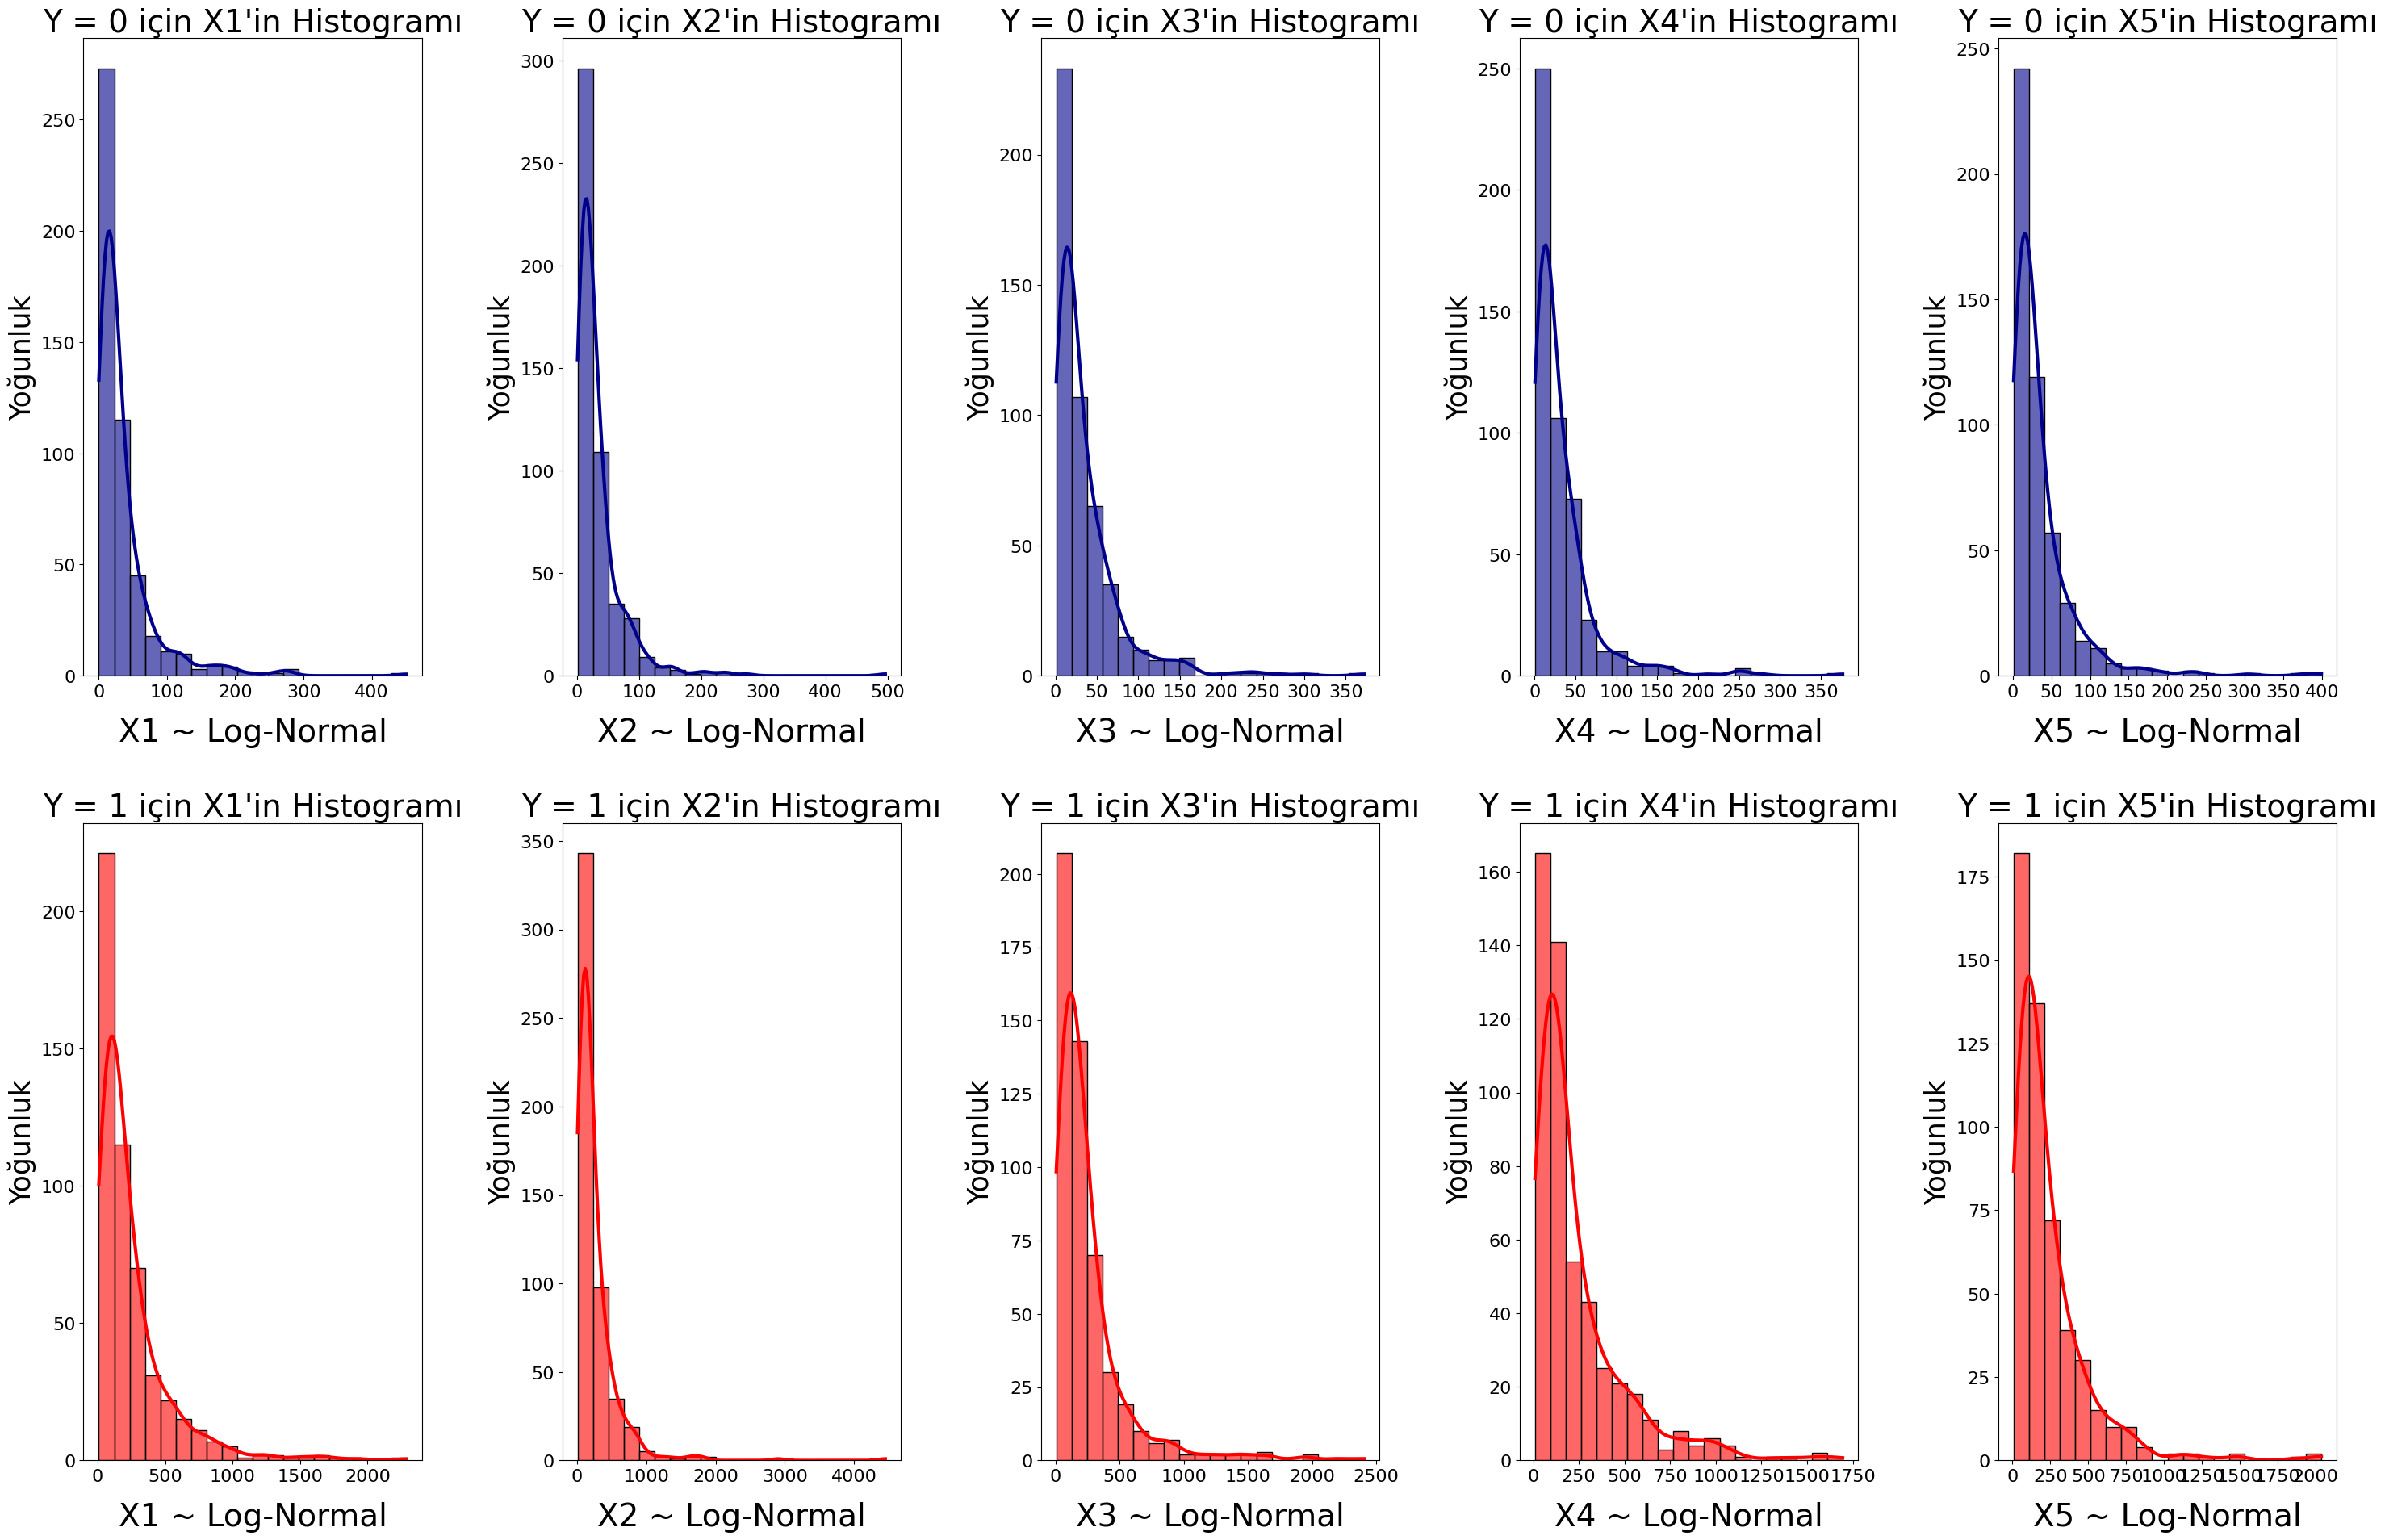

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

p = 0.5

results, X, y, X_y0, X_y1 = simulate_scenario(sample_size=1000, p=p)

# Grafik boyutunu ayarla
plt.figure(figsize=(30, 20))
    
# Y0'dan üretilen 5 değişkenin histogramları
for i in range(5):
    plt.subplot(2, 5, i + 1)
    sns.histplot(X_y0[:, i], bins=20, kde=True, color='darkblue', edgecolor="black", alpha=0.6, line_kws={'linewidth': 3})
    plt.title(f'Y = 0 için X{i+1}\'in Histogramı', fontsize=28)  
    plt.xlabel(f"X{i+1} ~ Log-Normal", fontsize=28, labelpad=15)    
    plt.ylabel('Yoğunluk', fontsize=25)  
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
# Y1'den üretilen 5 değişkenin histogramları
for i in range(5):
    plt.subplot(2, 5, 5 + i + 1)
    sns.histplot(X_y1[:, i], bins=20, kde=True, color='red', edgecolor="black", alpha=0.6, line_kws={'linewidth': 3})
    plt.title(f'Y = 1 için X{i+1}\'in Histogramı', fontsize=28) 
    plt.xlabel(f"X{i+1} ~ Log-Normal", fontsize=28, labelpad=15)    
    plt.ylabel('Yoğunluk', fontsize=25)  
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
plt.tight_layout(pad=4) 
plt.show()

#### 5 DEĞİŞKEN (2 KATEGORİK+3 SÜREKLİ)

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def simulate_scenario(sample_size, p):
    
    # y değerlerini oluştur (0 ve 1 etiketleri)
    bernoulli_data = np.random.binomial(n=1, p=p, size=sample_size)
    y_y1 = bernoulli_data[bernoulli_data==1]
    y_y0 = bernoulli_data[bernoulli_data==0]

    # Kovaryans matrisi
    cov_matrix = [
        [1.0, 0.2, 0.6, 0.6, 0.4],
        [0.2, 1.0, 0.6, 0.6, 0.6],
        [0.6, 0.6, 1.0, 0.6, 0.6],
        [0.6, 0.6, 0.6, 1.0, 0.2],
        [0.4, 0.6, 0.6, 0.2, 1.0]
    ]
    
    # Ortalamalar (5 değişken için)
    mean_y0 = [3, 3, 3, 3, 3]  # y = 0 için ortalama
    mean_y1 = [5, 5, 5, 5, 5]  # y = 1 için ortalama
    
    n_samples_y0=len(y_y0)
    n_samples_y1=len(y_y1)

    # y = 0 ve y = 1 için örnek üretimi
    X_y0 = np.random.multivariate_normal(mean_y0, cov_matrix, n_samples_y0)
    X_y1 = np.random.multivariate_normal(mean_y1, cov_matrix, n_samples_y1)

    # Log-normal dönüşümünü uygula
    X_y0 = np.exp(X_y0)  # y = 0 için veriyi log-normal hale getir
    X_y1 = np.exp(X_y1)  # y = 1 için veriyi log-normal hale getir
    
    # y değerlerini oluştur (0 ve 1 etiketleri)
    y_y0 = np.zeros(n_samples_y0)  # y = 0 için etiketler
    y_y1 = np.ones(n_samples_y1)   # y = 1 için etiketler

    # X ve y'yi birleştir
    X_main = np.vstack((X_y0, X_y1))  # X değerlerini birleştir
    y = np.hstack((y_y0, y_y1))  # y etiketlerini birleştir
      
    # Log-normal dağılımdan gürültü değişkenleri üretme
    # Log-normal parametreleri
    log_mean = 0  # Log-normal dağılımın ortalaması
    log_sigma = 1  # Log-normal dağılımın standart sapması


    X_y0_noise = np.random.lognormal(mean=log_mean, sigma=log_sigma, size=X_y0.shape)
    X_y1_noise = np.random.lognormal(mean=log_mean, sigma=log_sigma, size=X_y1.shape)

    
    # Ana değişkenler ve gürültü değişkenlerini toplayarak gürültü ekleyin
    X_noise_main = np.vstack((X_y0_noise, X_y1_noise))
    X = X_main + X_noise_main  # Gürültü eklenmiş X


    # Sürekli değişkenlerden 2'sini kategorik hale getirme
    Q3_x1 = np.percentile(X[:, 0], 75)  # x1 için üçüncü çeyrek
    Q2_x2 = np.percentile(X[:, 1], 50)  # x2 için medyan

    x1_categorical = (X[:, 0] > Q3_x1).astype(int)  # x1: üçüncü çeyrekten büyükse 1, değilse 0
    x2_categorical = (X[:, 1] > Q2_x2).astype(int)  # x2: medyandan büyükse 1, değilse 0

    # Sürekli ve kategorik değişkenleri birleştir
    X_continuous = X[:, 2:5]  # Sürekli değişkenlerden 3'ünü al
    X = np.column_stack((x1_categorical, x2_categorical, X_continuous))  # 3 sürekli + 2 kategorik


    
    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # ML modelleri
    models = {
        "Logistic Regression": LogisticRegression(max_iter=500, solver='liblinear'),
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto'),
        "Decision Tree": DecisionTreeClassifier(max_depth=5),
        "SVM": SVC(kernel='rbf', probability=True, C=1.0, gamma='scale'),
        "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1),
        "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm="SAMME"),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3), 
        "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results[name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "auc": auc,
            "mse": mse
        }

    return results, X, y, X_y0, X_y1

# Simülasyon sonuçlarını toplamak için
results1 = []

for p in [0.5, 0.3, 0.2]:
    aggregated_results = {model: {"accuracy": [], "precision": [], "recall": [], "f1": [], "auc": [], "mse": []}
                          for model in ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "SVM", "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost"]}

    for i in range(1000):  # 1000 tekrar
        scenario_results,X, y, X_y0, X_y1 = simulate_scenario(sample_size=1000,p=p)  # Sonuçları al

        for model, metrics in scenario_results.items():
            for metric, value in metrics.items():
                aggregated_results[model][metric].append(value)

    avg_results = {model: {metric: np.mean(values) for metric, values in metrics.items()}
                   for model, metrics in aggregated_results.items()}

    results1.append((p, avg_results))

# Sonuçları yazdırma
for p, avg_results in results1:
    print(f'\n--- Scenario with p={p} ---')
    for model, metrics in avg_results.items():
        print(f'\nModel: {model}')
        for metric, value in metrics.items():
            print(f'   {metric.capitalize():<10}: {value:.4f}')


--- Scenario with p=0.5 ---

Model: Logistic Regression
   Accuracy  : 0.8908
   Precision : 0.9143
   Recall    : 0.8626
   F1        : 0.8871
   Auc       : 0.9604
   Mse       : 0.1092

Model: Naive Bayes
   Accuracy  : 0.8644
   Precision : 0.9335
   Recall    : 0.7850
   F1        : 0.8519
   Auc       : 0.9418
   Mse       : 0.1356

Model: K-Nearest Neighbors
   Accuracy  : 0.8819
   Precision : 0.8814
   Recall    : 0.8829
   F1        : 0.8815
   Auc       : 0.9376
   Mse       : 0.1181

Model: Decision Tree
   Accuracy  : 0.8766
   Precision : 0.8809
   Recall    : 0.8723
   F1        : 0.8756
   Auc       : 0.9195
   Mse       : 0.1234

Model: SVM
   Accuracy  : 0.8888
   Precision : 0.9122
   Recall    : 0.8607
   F1        : 0.8851
   Auc       : 0.9561
   Mse       : 0.1112

Model: Random Forest
   Accuracy  : 0.8896
   Precision : 0.8914
   Recall    : 0.8878
   F1        : 0.8889
   Auc       : 0.9546
   Mse       : 0.1104

Model: AdaBoost
   Accuracy  : 0.8890
   Preci

## t dağılım

#### 5 SÜREKLİ DEĞİŞKEN

In [25]:
import numpy as np
from scipy.stats import multivariate_t
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def simulate_scenario(sample_size, p):
    
    # y değerlerini oluştur (0 ve 1 etiketleri)
    bernoulli_data = np.random.binomial(n=1, p=p, size=sample_size)
    y_y1 = bernoulli_data[bernoulli_data==1]
    y_y0 = bernoulli_data[bernoulli_data==0]

    # Kovaryans matrisi
    cov_matrix = [
        [1.0, 0.2, 0.6, 0.6, 0.4],
        [0.2, 1.0, 0.6, 0.6, 0.6],
        [0.6, 0.6, 1.0, 0.6, 0.6],
        [0.6, 0.6, 0.6, 1.0, 0.2],
        [0.4, 0.6, 0.6, 0.2, 1.0]
    ]

    # serbestlik derecesi
    df=3

    # Ortalamalar (5 değişken için)
    mean_y0 = [3, 3, 3, 3, 3]  # y = 0 için ortalama
    mean_y1 = [5, 5, 5, 5, 5]  # y = 1 için ortalama
    
    n_samples_y0=len(y_y0)
    n_samples_y1=len(y_y1)

    # Çok değişkenli t-dağılımından veri üretme 
    X_y0 = multivariate_t.rvs(loc=mean_y0, shape=cov_matrix, df=df, size=n_samples_y0)
    X_y1 = multivariate_t.rvs(loc=mean_y1, shape=cov_matrix, df=df, size=n_samples_y1)

    # y değerlerini oluştur
    y_y0 = np.zeros(n_samples_y0)  
    y_y1 = np.ones(n_samples_y1)   

    # X ve y'yi birleştir
    X_main = np.vstack((X_y0, X_y1))
    y = np.hstack((y_y0, y_y1))

    # Gürültü değişkenleri için t-dağılımı
    noise_cov_matrix = np.eye(5)  
    X_y0_noise = multivariate_t.rvs(loc=np.zeros(5), shape=noise_cov_matrix, df=df, size=n_samples_y0)
    X_y1_noise = multivariate_t.rvs(loc=np.zeros(5), shape=noise_cov_matrix, df=df, size=n_samples_y1)


    # Ana değişkenler ve gürültü değişkenlerini toplayarak gürültü ekleyin
    X_noise_main = np.vstack((X_y0_noise, X_y1_noise))
    X = X_main + X_noise_main  # Gürültü eklenmiş X
    
    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # ML modelleri
    models = {
        "Logistic Regression": LogisticRegression(max_iter=500, solver='lbfgs'),
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto'),
        "Decision Tree": DecisionTreeClassifier(max_depth=5),
        "SVM": SVC(kernel='rbf', probability=True, C=1.0, gamma='scale'),
        "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1),
        "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0,algorithm="SAMME"),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3), 
        "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results[name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "auc": auc,
            "mse": mse
        }

    return results, X, y, X_y0, X_y1

# Simülasyon sonuçlarını toplamak için
results1 = []

for p in [0.5, 0.3, 0.2]:
    aggregated_results = {model: {"accuracy": [], "precision": [], "recall": [], "f1": [], "auc": [], "mse": []}
                          for model in ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "SVM", "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost"]}

    for i in range(1000):  # 1000 tekrar
        scenario_results,X, y, X_y0, X_y1 = simulate_scenario(sample_size=1000,p=p)  # Sonuçları al

        for model, metrics in scenario_results.items():
            for metric, value in metrics.items():
                aggregated_results[model][metric].append(value)

    avg_results = {model: {metric: np.mean(values) for metric, values in metrics.items()}
                   for model, metrics in aggregated_results.items()}

    results1.append((p, avg_results))

# Sonuçları yazdırma
for p, avg_results in results1:
    print(f'\n--- Scenario with p={p} ---')
    for model, metrics in avg_results.items():
        print(f'\nModel: {model}')
        for metric, value in metrics.items():
            print(f'   {metric.capitalize():<10}: {value:.4f}')



--- Scenario with p=0.5 ---

Model: Logistic Regression
   Accuracy  : 0.8079
   Precision : 0.8069
   Recall    : 0.8102
   F1        : 0.8076
   Auc       : 0.8666
   Mse       : 0.1921

Model: Naive Bayes
   Accuracy  : 0.8022
   Precision : 0.8015
   Recall    : 0.8066
   F1        : 0.8018
   Auc       : 0.8646
   Mse       : 0.1978

Model: K-Nearest Neighbors
   Accuracy  : 0.7870
   Precision : 0.7861
   Recall    : 0.7890
   F1        : 0.7865
   Auc       : 0.8440
   Mse       : 0.2130

Model: Decision Tree
   Accuracy  : 0.7626
   Precision : 0.7635
   Recall    : 0.7628
   F1        : 0.7615
   Auc       : 0.8042
   Mse       : 0.2374

Model: SVM
   Accuracy  : 0.8053
   Precision : 0.8039
   Recall    : 0.8085
   F1        : 0.8050
   Auc       : 0.8757
   Mse       : 0.1947

Model: Random Forest
   Accuracy  : 0.7913
   Precision : 0.7907
   Recall    : 0.7927
   F1        : 0.7906
   Auc       : 0.8652
   Mse       : 0.2087

Model: AdaBoost
   Accuracy  : 0.7856
   Preci

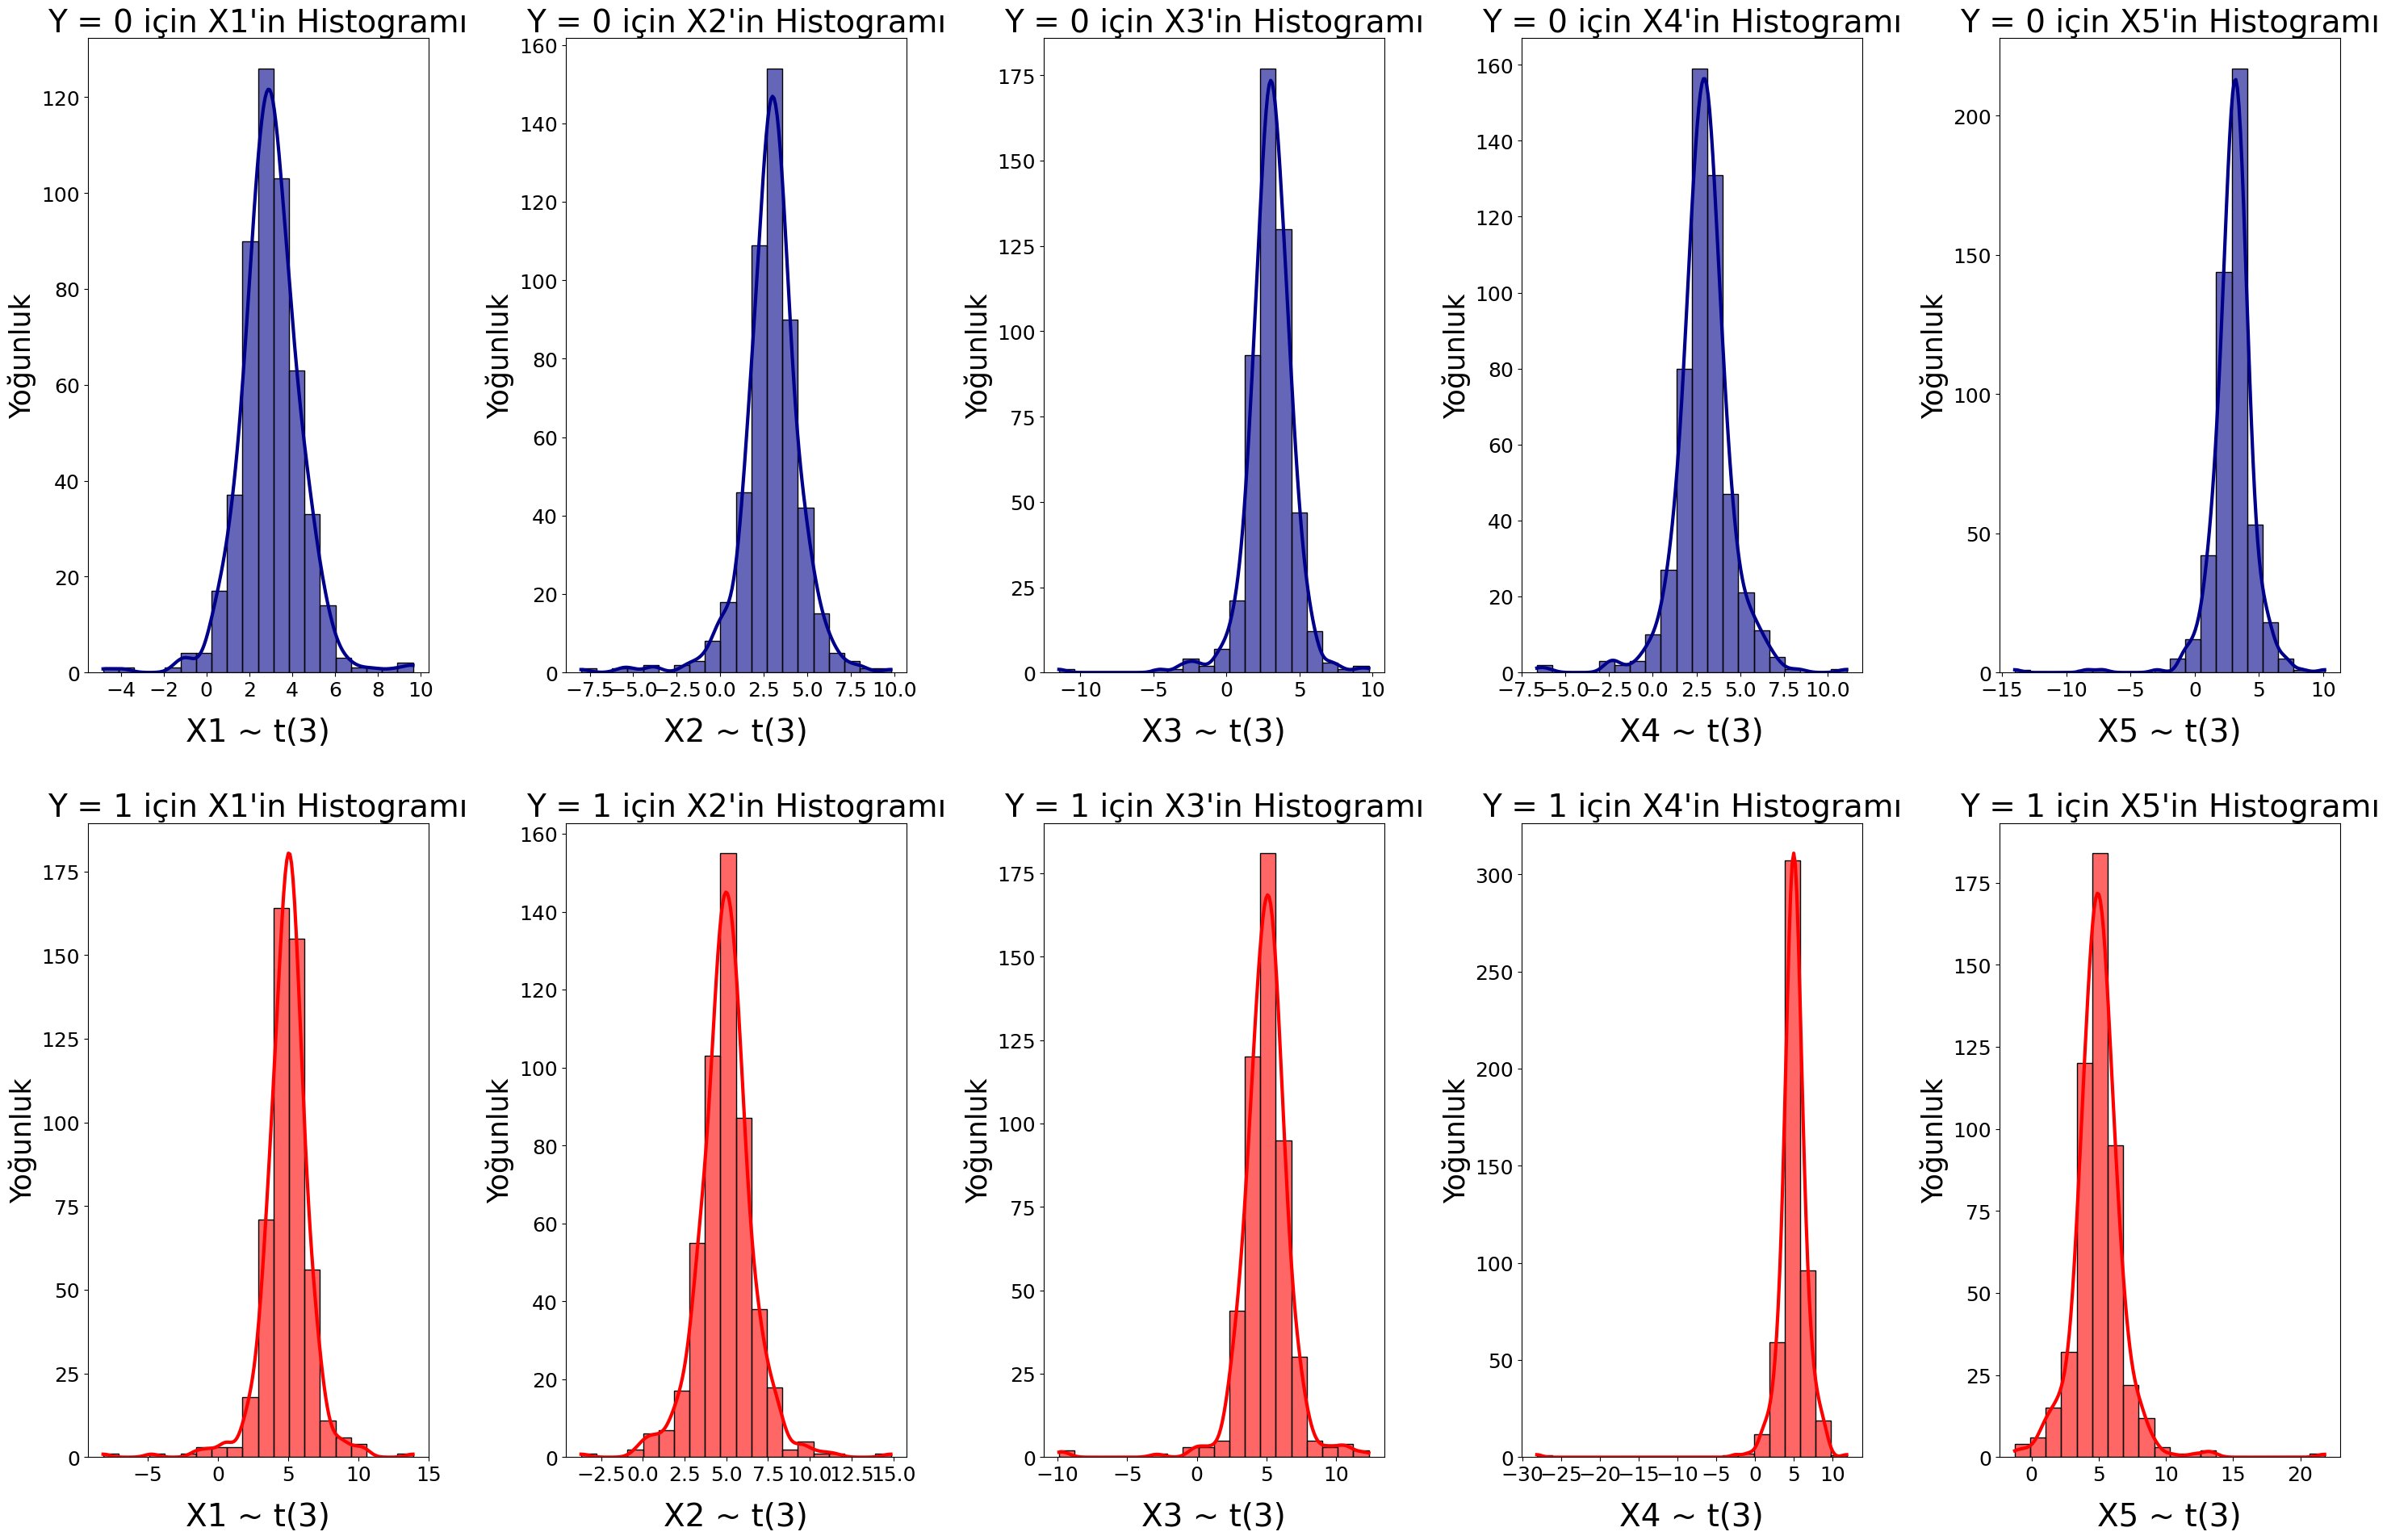

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

p = 0.5

results, X, y, X_y0, X_y1 = simulate_scenario(sample_size=1000, p=p)

# Grafik boyutunu ayarla
plt.figure(figsize=(30, 20))
    
for i in range(5):
    plt.subplot(2, 5, i + 1)
    sns.histplot(X_y0[:, i], bins=20, kde=True, color='darkblue', edgecolor="black", alpha=0.6, line_kws={'linewidth': 3})
    plt.title(f'Y = 0 için X{i+1}\'in Histogramı', fontsize=28)  
    plt.xlabel(f"X{i+1} ~ t(3)", fontsize=28, labelpad=15)   
    plt.ylabel('Yoğunluk', fontsize=25)  
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
# Y1'den üretilen 5 değişkenin histogramları
for i in range(5):
    plt.subplot(2, 5, 5 + i + 1)
    sns.histplot(X_y1[:, i], bins=20, kde=True, color='red', edgecolor="black", alpha=0.6, line_kws={'linewidth': 3})
    plt.title(f'Y = 1 için X{i+1}\'in Histogramı', fontsize=28)  
    plt.xlabel(f"X{i+1} ~ t(3)", fontsize=28, labelpad=15) 
    plt.ylabel('Yoğunluk', fontsize=25)  
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
plt.tight_layout(pad=4) 
plt.show()

#### 5 DEĞİŞKEN (2 KATEGORİK+3 SÜREKLİ)

In [27]:
import numpy as np
from scipy.stats import multivariate_t
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def simulate_scenario(sample_size, p):
    
    # y değerlerini oluştur (0 ve 1 etiketleri)
    bernoulli_data = np.random.binomial(n=1, p=p, size=sample_size)
    y_y1 = bernoulli_data[bernoulli_data==1]
    y_y0 = bernoulli_data[bernoulli_data==0]

    # Kovaryans matrisi
    cov_matrix = [
        [1.0, 0.2, 0.6, 0.6, 0.4],
        [0.2, 1.0, 0.6, 0.6, 0.6],
        [0.6, 0.6, 1.0, 0.6, 0.6],
        [0.6, 0.6, 0.6, 1.0, 0.2],
        [0.4, 0.6, 0.6, 0.2, 1.0]
    ]

    # serbestlik derecesi
    df=3

    # Ortalamalar (5 değişken için)
    mean_y0 = [3, 3, 3, 3, 3]  # y = 0 için ortalama
    mean_y1 = [5, 5, 5, 5, 5]  # y = 1 için ortalama
    
    n_samples_y0=len(y_y0)
    n_samples_y1=len(y_y1)

    # Çok değişkenli t-dağılımından veri üretme 
    X_y0 = multivariate_t.rvs(loc=mean_y0, shape=cov_matrix, df=df, size=n_samples_y0)
    X_y1 = multivariate_t.rvs(loc=mean_y1, shape=cov_matrix, df=df, size=n_samples_y1)

    # y değerlerini oluştur
    y_y0 = np.zeros(n_samples_y0)  
    y_y1 = np.ones(n_samples_y1)   

    # X ve y'yi birleştir
    X_main = np.vstack((X_y0, X_y1))
    y = np.hstack((y_y0, y_y1))

    # Gürültü değişkenleri için t-dağılımı
    noise_cov_matrix = np.eye(5)  
    X_y0_noise = multivariate_t.rvs(loc=np.zeros(5), shape=noise_cov_matrix, df=df, size=n_samples_y0)
    X_y1_noise = multivariate_t.rvs(loc=np.zeros(5), shape=noise_cov_matrix, df=df, size=n_samples_y1)


    # Ana değişkenler ve gürültü değişkenlerini toplayarak gürültü ekleyin
    X_noise_main = np.vstack((X_y0_noise, X_y1_noise))
    X = X_main + X_noise_main  # Gürültü eklenmiş X


    # Sürekli değişkenlerden 2'sini kategorik hale getirme
    Q3_x1 = np.percentile(X[:, 0], 75)  # x1 için üçüncü çeyrek
    Q2_x2 = np.percentile(X[:, 1], 50)  # x2 için medyan

    x1_categorical = (X[:, 0] > Q3_x1).astype(int)  # x1: üçüncü çeyrekten büyükse 1, değilse 0
    x2_categorical = (X[:, 1] > Q2_x2).astype(int)  # x2: medyandan büyükse 1, değilse 0

    # Sürekli ve kategorik değişkenleri birleştir
    X_continuous = X[:, 2:5]  # Sürekli değişkenlerden 3'ünü al
    X = np.column_stack((x1_categorical, x2_categorical, X_continuous))  # 3 sürekli + 2 kategorik
    

    
    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # ML modelleri
    models = {
        "Logistic Regression": LogisticRegression(max_iter=500, solver='lbfgs'),
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto'),
        "Decision Tree": DecisionTreeClassifier(max_depth=5),
        "SVM": SVC(kernel='rbf', probability=True, C=1.0, gamma='scale'),
        "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1),
        "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0,algorithm="SAMME"),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3), 
        "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results[name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "auc": auc,
            "mse": mse
        }

    return results, X, y, X_y0, X_y1

# Simülasyon sonuçlarını toplamak için
results1 = []

for p in [0.5, 0.3, 0.2]:
    aggregated_results = {model: {"accuracy": [], "precision": [], "recall": [], "f1": [], "auc": [], "mse": []}
                          for model in ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "SVM", "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost"]}

    for i in range(1000):  # 1000 tekrar
        scenario_results,X, y, X_y0, X_y1 = simulate_scenario(sample_size=1000,p=p)  # Sonuçları al

        for model, metrics in scenario_results.items():
            for metric, value in metrics.items():
                aggregated_results[model][metric].append(value)

    avg_results = {model: {metric: np.mean(values) for metric, values in metrics.items()}
                   for model, metrics in aggregated_results.items()}

    results1.append((p, avg_results))

# Sonuçları yazdırma
for p, avg_results in results1:
    print(f'\n--- Scenario with p={p} ---')
    for model, metrics in avg_results.items():
        print(f'\nModel: {model}')
        for metric, value in metrics.items():
            print(f'   {metric.capitalize():<10}: {value:.4f}')



--- Scenario with p=0.5 ---

Model: Logistic Regression
   Accuracy  : 0.7899
   Precision : 0.7905
   Recall    : 0.7864
   F1        : 0.7874
   Auc       : 0.8569
   Mse       : 0.2101

Model: Naive Bayes
   Accuracy  : 0.7813
   Precision : 0.7870
   Recall    : 0.7688
   F1        : 0.7764
   Auc       : 0.8482
   Mse       : 0.2187

Model: K-Nearest Neighbors
   Accuracy  : 0.7658
   Precision : 0.7688
   Recall    : 0.7571
   F1        : 0.7617
   Auc       : 0.8246
   Mse       : 0.2342

Model: Decision Tree
   Accuracy  : 0.7560
   Precision : 0.7587
   Recall    : 0.7489
   F1        : 0.7519
   Auc       : 0.8025
   Mse       : 0.2440

Model: SVM
   Accuracy  : 0.7939
   Precision : 0.7943
   Recall    : 0.7911
   F1        : 0.7915
   Auc       : 0.8653
   Mse       : 0.2061

Model: Random Forest
   Accuracy  : 0.7750
   Precision : 0.7736
   Recall    : 0.7748
   F1        : 0.7730
   Auc       : 0.8473
   Mse       : 0.2250

Model: AdaBoost
   Accuracy  : 0.7788
   Preci

## gamma-t 

#### 5 SÜREKLİ DEĞİŞKEN

In [28]:
import numpy as np
from scipy.stats import norm, gamma, t
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

def simulate_scenario(sample_size, p):
    
    # y değerlerini oluştur (0 ve 1 etiketleri)
    bernoulli_data = np.random.binomial(n=1, p=p, size=sample_size)
    y_y1 = bernoulli_data[bernoulli_data==1]
    y_y0 = bernoulli_data[bernoulli_data==0]

    
    # Kovaryans matrisi
    cov_matrix = [
        [1.0, 0.2, 0.6, 0.6, 0.4],
        [0.2, 1.0, 0.6, 0.6, 0.6],
        [0.6, 0.6, 1.0, 0.6, 0.6],
        [0.6, 0.6, 0.6, 1.0, 0.2],
        [0.4, 0.6, 0.6, 0.2, 1.0]]


    # Serbestlik derecesi (t-dağılımı için)
    df_t = 5  

    n_samples_y0=len(y_y0)
    n_samples_y1=len(y_y1)
    
    # Ortalamalar
    mean_y0 = [0, 0, 0, 0, 0]
    mean_y1 = [0, 0, 0, 0, 0]

    # Çok değişkenli normal dağılımdan örnek üret
    Z_y0 = np.random.multivariate_normal(mean_y0, cov_matrix, n_samples_y0)
    Z_y1 = np.random.multivariate_normal(mean_y1, cov_matrix, n_samples_y1)
    
    # üretilen değerlerin cdf dönüştürülmesi
    U_y0 = norm.cdf(Z_y0)  # Artık her değer [0,1] aralığında
    U_y1 = norm.cdf(Z_y1)  # Artık her değer [0,1] aralığında
    
    # Y0 için: 2 Gamma ve 3 t-dağılımından örnek üretme
    X_y0_gamma = np.column_stack([3+gamma.ppf(U_y0[:, i], 2, scale=1) for i in range(2)])
    X_y0_t = np.column_stack([3+t.ppf(U_y0[:, i], df_t) for i in range(-3,0)])
    X_y0 = np.hstack([X_y0_gamma, X_y0_t])
    
    # Y1 için: 2 Gamma ve 3 t-dağılımından örnek üretme
    X_y1_gamma = np.column_stack([5+gamma.ppf(U_y1[:, i], 2, scale=1) for i in range(2)])
    X_y1_t = np.column_stack([5+t.ppf(U_y1[:, i], df_t) for i in range(-3,0)])
    X_y1 = np.hstack([X_y1_gamma, X_y1_t])
    
    # y değerlerini oluştur
    y_y0 = np.zeros(n_samples_y0)  
    y_y1 = np.ones(n_samples_y1)

    # X ve y'yi birleştir
    X = np.vstack((X_y0, X_y1))
    y = np.hstack((y_y0, y_y1))

    # Sınıf Bazlı Gürültü Değişkenleri
    noise_Z_y0 = np.random.multivariate_normal(np.zeros(5), np.eye(5), size=n_samples_y0)
    noise_Z_y1 = np.random.multivariate_normal(np.zeros(5), np.eye(5), size=n_samples_y1)

    # üretilen değerlerin cdf dönüştürülmesi
    noise_U_y0 = norm.cdf(noise_Z_y0)  # Artık her değer [0,1] aralığında
    noise_U_y1 = norm.cdf(noise_Z_y1)  # Artık her değer [0,1] aralığında

    # Noise Y0 için: 2 Gamma ve 3 t-dağılımından örnek üretme
    noise_X_y0_gamma = np.column_stack([gamma.ppf(noise_U_y0[:, i], 2, scale=1) for i in range(2)])
    noise_X_y0_t = np.column_stack([t.ppf(noise_U_y0[:, i], df_t) for i in range(-3,0)])
    X_noise_y0 = np.hstack([noise_X_y0_gamma, noise_X_y0_t])

    # Noise Y1 için: 2 Gamma ve 3 t-dağılımından örnek üretme
    noise_X_y1_gamma = np.column_stack([gamma.ppf(noise_U_y1[:, i], 2, scale=1) for i in range(2)])
    noise_X_y1_t = np.column_stack([t.ppf(noise_U_y1[:, i], df_t) for i in range(-3,0)])
    X_noise_y1 = np.hstack([noise_X_y1_gamma, noise_X_y1_t])

    X_noise = np.vstack((X_noise_y0, X_noise_y1))

    # Gürültüyü ekle
    X = X + X_noise
    
    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # ML modelleri
    models = {
        "Logistic Regression": LogisticRegression(max_iter=500, solver='lbfgs'),
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto'),
        "Decision Tree": DecisionTreeClassifier(max_depth=5),
        "SVM": SVC(kernel='rbf', probability=True, C=1.0, gamma='scale'),
        "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1),
        "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0,algorithm="SAMME"),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3), 
        "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results[name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "auc": auc,
            "mse": mse
        }

    return results, X, y, X_y0, X_y1

# Simülasyon çalıştırma
results1 = []

for p in [0.5, 0.3, 0.2]:
    aggregated_results = {model: {"accuracy": [], "precision": [], "recall": [], "f1": [], "auc": [], "mse": []}
                          for model in ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "SVM", "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost"]}

    for i in range(1000):  # 1000 tekrar
        scenario_results,X, y, X_y0, X_y1 = simulate_scenario(sample_size=1000,p=p)  # Sonuçları al

        for model, metrics in scenario_results.items():
            for metric, value in metrics.items():
                aggregated_results[model][metric].append(value)

    avg_results = {model: {metric: np.mean(values) for metric, values in metrics.items()}
                   for model, metrics in aggregated_results.items()}

    results1.append((p, avg_results))

# Sonuçları yazdırma
for p, avg_results in results1:
    print(f'\n--- Scenario with p={p} ---')
    for model, metrics in avg_results.items():
        print(f'\nModel: {model}')
        for metric, value in metrics.items():
            print(f'   {metric.capitalize():<10}: {value:.4f}')


--- Scenario with p=0.5 ---

Model: Logistic Regression
   Accuracy  : 0.8130
   Precision : 0.8137
   Recall    : 0.8135
   F1        : 0.8126
   Auc       : 0.8893
   Mse       : 0.1870

Model: Naive Bayes
   Accuracy  : 0.8131
   Precision : 0.8158
   Recall    : 0.8104
   F1        : 0.8121
   Auc       : 0.8896
   Mse       : 0.1869

Model: K-Nearest Neighbors
   Accuracy  : 0.8029
   Precision : 0.7874
   Recall    : 0.8317
   F1        : 0.8080
   Auc       : 0.8692
   Mse       : 0.1971

Model: Decision Tree
   Accuracy  : 0.7989
   Precision : 0.7848
   Recall    : 0.8275
   F1        : 0.8038
   Auc       : 0.8544
   Mse       : 0.2011

Model: SVM
   Accuracy  : 0.8241
   Precision : 0.8129
   Recall    : 0.8441
   F1        : 0.8272
   Auc       : 0.9003
   Mse       : 0.1759

Model: Random Forest
   Accuracy  : 0.8206
   Precision : 0.8139
   Recall    : 0.8329
   F1        : 0.8223
   Auc       : 0.8982
   Mse       : 0.1794

Model: AdaBoost
   Accuracy  : 0.8176
   Preci

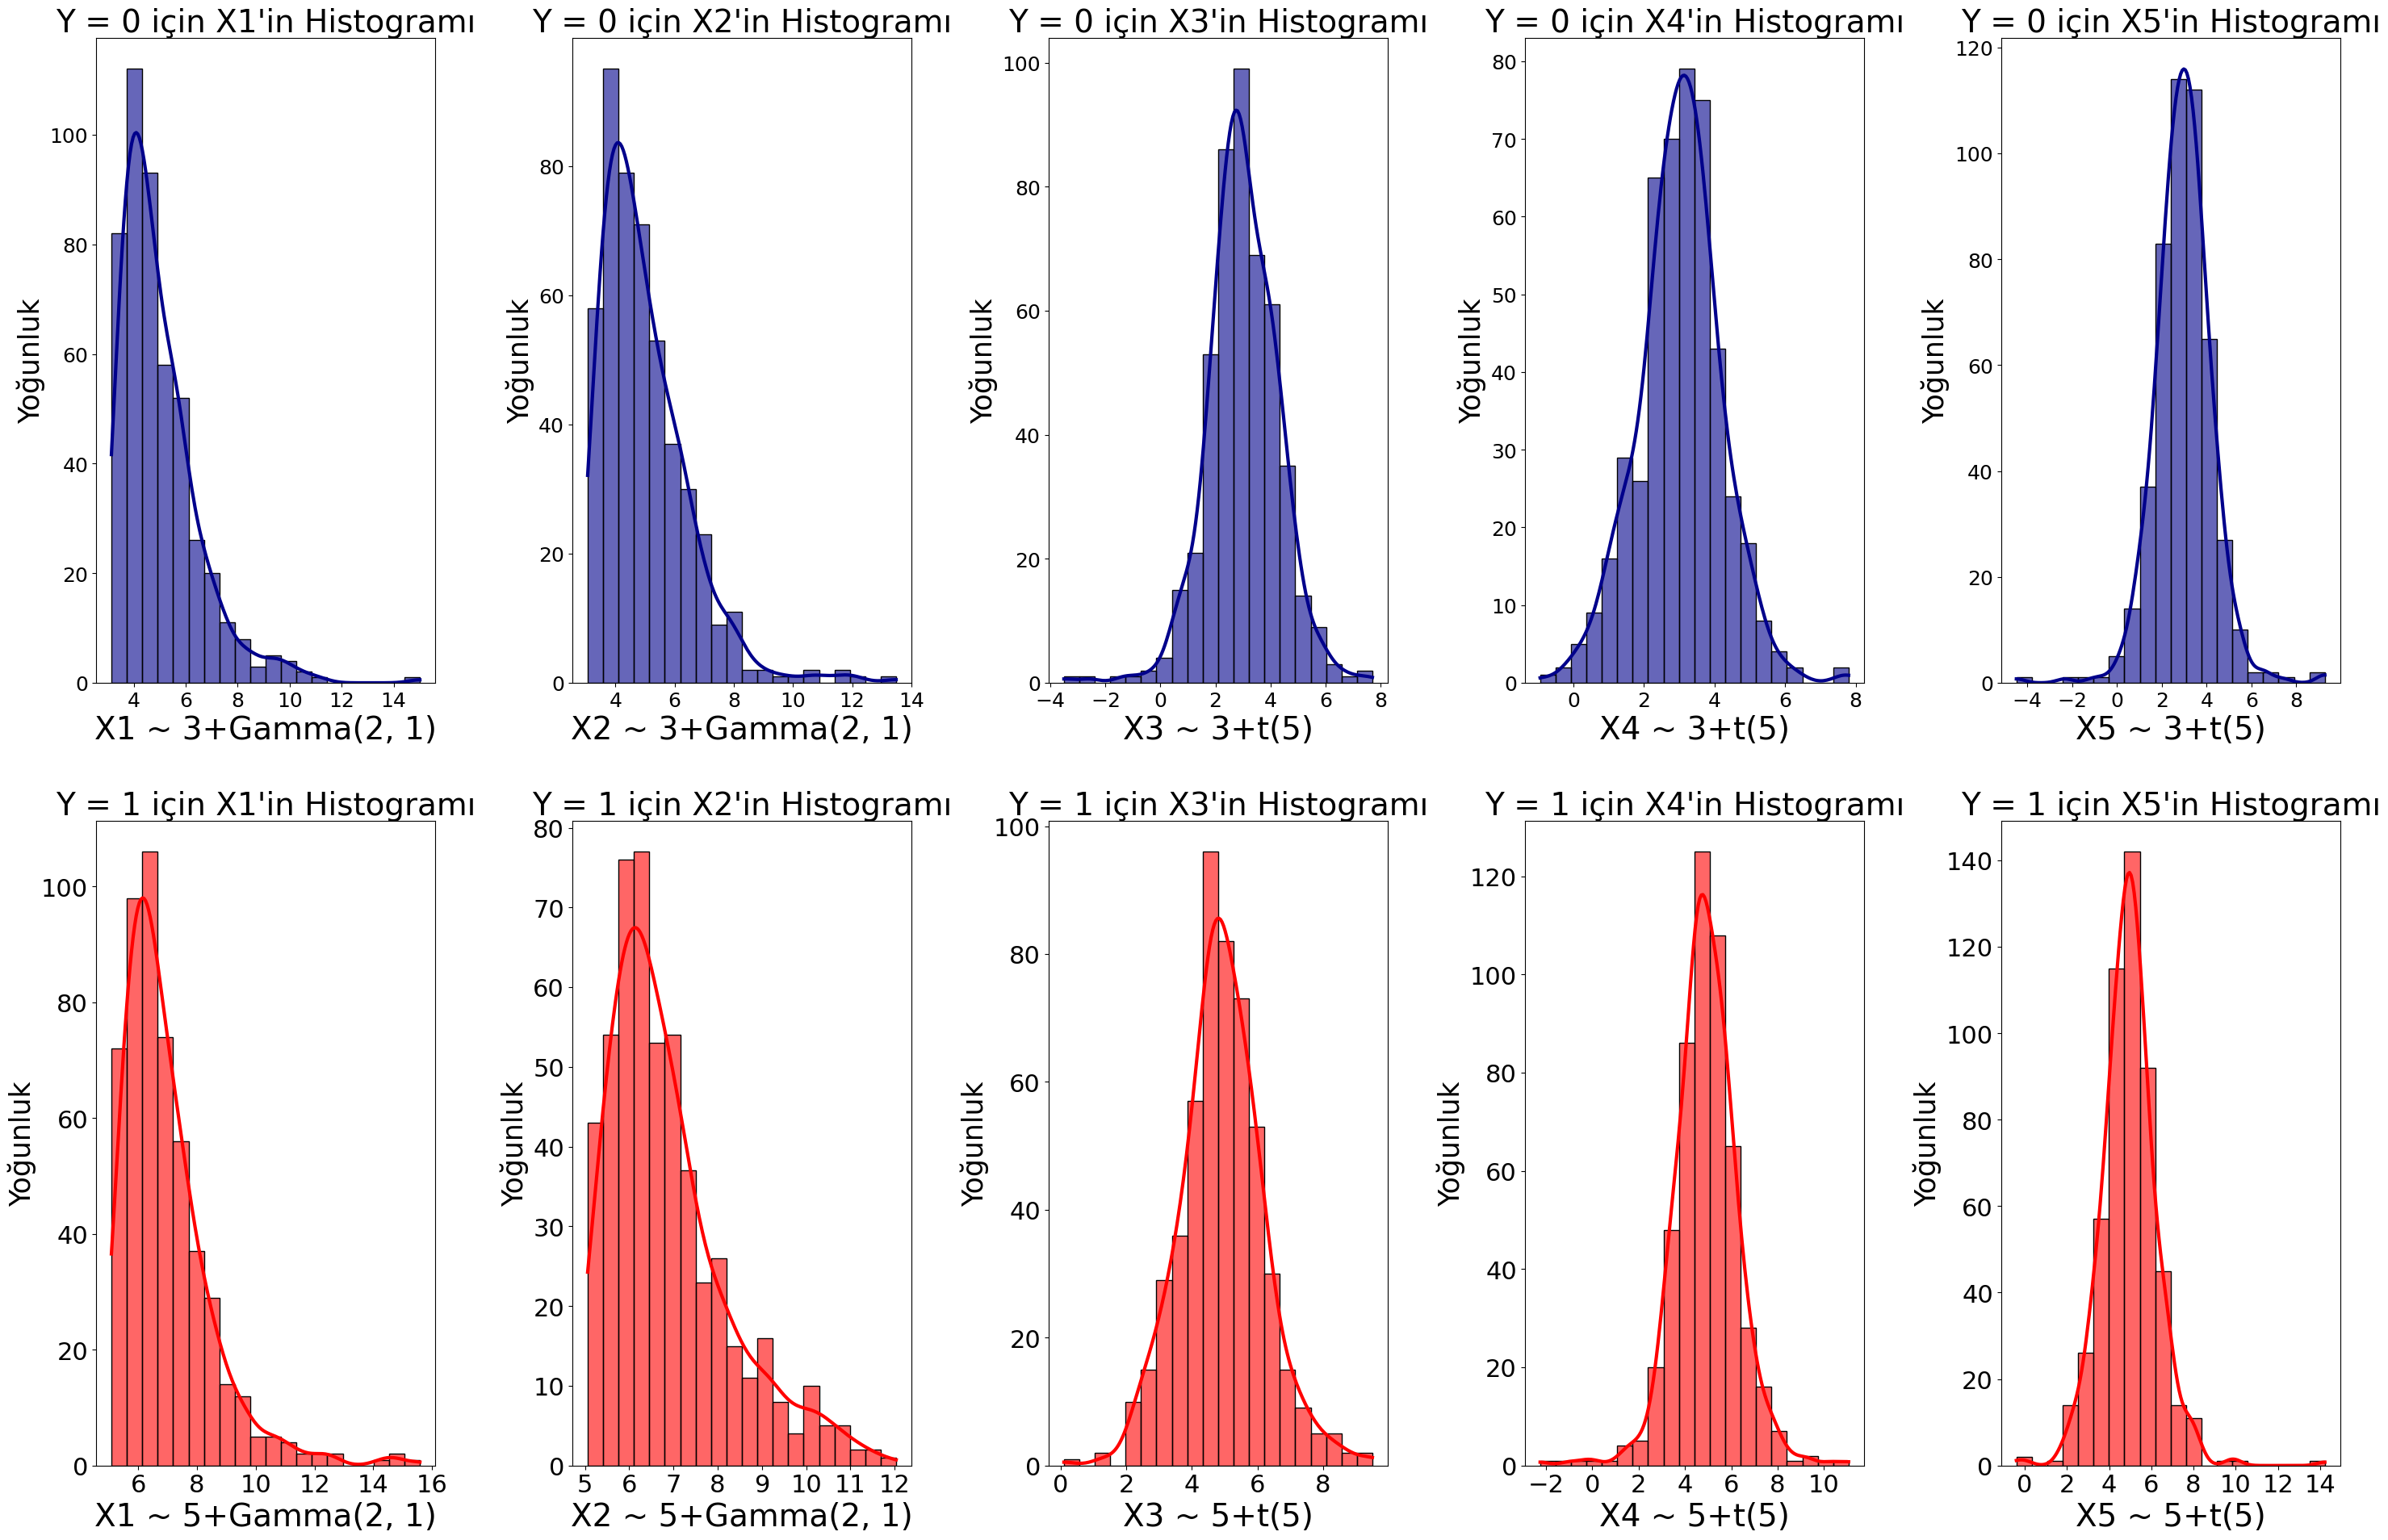

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

p = 0.5

results, X, y, X_y0, X_y1 = simulate_scenario(sample_size=1000, p=p)

# Grafik boyutunu ayarla
plt.figure(figsize=(30, 20))
    
# Y0'dan üretilen 5 değişkenin histogramları
for i in range(5):
    plt.subplot(2, 5, i + 1)
    sns.histplot(X_y0[:, i], bins=20, kde=True, color='darkblue', edgecolor="black", alpha=0.6, line_kws={'linewidth': 3})
    plt.title(f'Y = 0 için X{i+1}\'in Histogramı', fontsize=28)  
    if i < 2:
        plt.xlabel(f"X{i+1} ~ 3+Gamma(2, 1)", fontsize=28)  
    else:
        plt.xlabel(f"X{i+1} ~ 3+t(5)", fontsize=28)    
    plt.ylabel('Yoğunluk', fontsize=25)  
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
# Y1'den üretilen 5 değişkenin histogramları
for i in range(5):
    plt.subplot(2, 5, 5 + i + 1)
    sns.histplot(X_y1[:, i], bins=20, kde=True, color='red', edgecolor="black", alpha=0.6, line_kws={'linewidth': 3})
    plt.title(f'Y = 1 için X{i+1}\'in Histogramı', fontsize=28)  
    if i < 2:
        plt.xlabel(f"X{i+1} ~ 5+Gamma(2, 1)", fontsize=28)  
    else:
        plt.xlabel(f"X{i+1} ~ 5+t(5)", fontsize=28) 
    plt.ylabel('Yoğunluk', fontsize=25)  
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    
plt.tight_layout(pad=4) 
plt.show()


#### 5 DEĞİŞKEN (2 KATEGORİK+3 SÜREKLİ)

In [33]:
import numpy as np
from scipy.stats import norm, gamma, t
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

def simulate_scenario(sample_size, p):
    
    # y değerlerini oluştur (0 ve 1 etiketleri)
    bernoulli_data = np.random.binomial(n=1, p=p, size=sample_size)
    y_y1 = bernoulli_data[bernoulli_data==1]
    y_y0 = bernoulli_data[bernoulli_data==0]

    
    # Kovaryans matrisi
    cov_matrix = [
        [1.0, 0.2, 0.6, 0.6, 0.4],
        [0.2, 1.0, 0.6, 0.6, 0.6],
        [0.6, 0.6, 1.0, 0.6, 0.6],
        [0.6, 0.6, 0.6, 1.0, 0.2],
        [0.4, 0.6, 0.6, 0.2, 1.0]]


    # Serbestlik derecesi (t-dağılımı için)
    df_t = 5  

    n_samples_y0=len(y_y0)
    n_samples_y1=len(y_y1)
    
    # Ortalamalar
    mean_y0 = [0, 0, 0, 0, 0]
    mean_y1 = [0, 0, 0, 0, 0]

    # Çok değişkenli normal dağılımdan örnek üret
    Z_y0 = np.random.multivariate_normal(mean_y0, cov_matrix, n_samples_y0)
    Z_y1 = np.random.multivariate_normal(mean_y1, cov_matrix, n_samples_y1)
    
    # üretilen değerlerin cdf dönüştürülmesi
    U_y0 = norm.cdf(Z_y0)  # Artık her değer [0,1] aralığında
    U_y1 = norm.cdf(Z_y1)  # Artık her değer [0,1] aralığında
    
    # Y0 için: 2 Gamma ve 3 t-dağılımından örnek üretme
    X_y0_gamma = np.column_stack([3+gamma.ppf(U_y0[:, i], 2, scale=1) for i in range(2)])
    X_y0_t = np.column_stack([3+t.ppf(U_y0[:, i], df_t) for i in range(-3,0)])
    X_y0 = np.hstack([X_y0_gamma, X_y0_t])
    
    # Y1 için: 2 Gamma ve 3 t-dağılımından örnek üretme
    X_y1_gamma = np.column_stack([5+gamma.ppf(U_y1[:, i], 2, scale=1) for i in range(2)])
    X_y1_t = np.column_stack([5+t.ppf(U_y1[:, i], df_t) for i in range(-3,0)])
    X_y1 = np.hstack([X_y1_gamma, X_y1_t])
    
    # y değerlerini oluştur
    y_y0 = np.zeros(n_samples_y0)  
    y_y1 = np.ones(n_samples_y1)

    # X ve y'yi birleştir
    X = np.vstack((X_y0, X_y1))
    y = np.hstack((y_y0, y_y1))

    # Sınıf Bazlı Gürültü Değişkenleri
    noise_Z_y0 = np.random.multivariate_normal(np.zeros(5), np.eye(5), size=n_samples_y0)
    noise_Z_y1 = np.random.multivariate_normal(np.zeros(5), np.eye(5), size=n_samples_y1)

    # üretilen değerlerin cdf dönüştürülmesi
    noise_U_y0 = norm.cdf(noise_Z_y0)  # Artık her değer [0,1] aralığında
    noise_U_y1 = norm.cdf(noise_Z_y1)  # Artık her değer [0,1] aralığında

    # Noise Y0 için: 2 Gamma ve 3 t-dağılımından örnek üretme
    noise_X_y0_gamma = np.column_stack([gamma.ppf(noise_U_y0[:, i], 2, scale=1) for i in range(2)])
    noise_X_y0_t = np.column_stack([t.ppf(noise_U_y0[:, i], df_t) for i in range(-3,0)])
    X_noise_y0 = np.hstack([noise_X_y0_gamma, noise_X_y0_t])

    # Noise Y1 için: 2 Gamma ve 3 t-dağılımından örnek üretme
    noise_X_y1_gamma = np.column_stack([gamma.ppf(noise_U_y1[:, i], 2, scale=1) for i in range(2)])
    noise_X_y1_t = np.column_stack([t.ppf(noise_U_y1[:, i], df_t) for i in range(-3,0)])
    X_noise_y1 = np.hstack([noise_X_y1_gamma, noise_X_y1_t])

    X_noise = np.vstack((X_noise_y0, X_noise_y1))

    # Gürültüyü ekle
    X = X + X_noise

    # Sürekli değişkenlerden 2'sini kategorik hale getirme
    Q2_x1 = np.percentile(X[:, 0], 50)  # x1 için medyan
    Q2_x3 = np.percentile(X[:, 2], 50)  # x3 için medyan

    x1_categorical = (X[:, 0] > Q2_x1).astype(int)  # x1: 2. çeyrekten büyükse 1, değilse 0
    x3_categorical = (X[:, 2] > Q2_x3).astype(int)  # x3: medyandan büyükse 1, değilse 0

    # Sürekli ve kategorik değişkenleri birleştir
    X_continuous = X[:, [1,3,4]]  # Sürekli değişkenlerden 3'ünü al
    X = np.column_stack((x1_categorical, x3_categorical, X_continuous))  # 3 sürekli + 2 kategorik
    
    # Eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # ML modelleri
    models = {
        "Logistic Regression": LogisticRegression(max_iter=500, solver='lbfgs'),
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto'),
        "Decision Tree": DecisionTreeClassifier(max_depth=5),
        "SVM": SVC(kernel='rbf', probability=True, C=1.0, gamma='scale'),
        "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1),
        "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0,algorithm="SAMME"),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3), 
        "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results[name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "auc": auc,
            "mse": mse
        }

    return results, X, y, X_y0, X_y1

# Simülasyon çalıştırma
results1 = []


for p in [0.5, 0.3, 0.2]:
    aggregated_results = {model: {"accuracy": [], "precision": [], "recall": [], "f1": [], "auc": [], "mse": []}
                          for model in ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "SVM", "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost"]}

    for i in range(1000):  # 1000 tekrar
        scenario_results,X, y, X_y0, X_y1 = simulate_scenario(sample_size=1000,p=p)  # Sonuçları al

        for model, metrics in scenario_results.items():
            for metric, value in metrics.items():
                aggregated_results[model][metric].append(value)

    avg_results = {model: {metric: np.mean(values) for metric, values in metrics.items()}
                   for model, metrics in aggregated_results.items()}

    results1.append((p, avg_results))

# Sonuçları yazdırma
for p, avg_results in results1:
    print(f'\n--- Scenario with p={p} ---')
    for model, metrics in avg_results.items():
        print(f'\nModel: {model}')
        for metric, value in metrics.items():
            print(f'   {metric.capitalize():<10}: {value:.4f}')


--- Scenario with p=0.5 ---

Model: Logistic Regression
   Accuracy  : 0.8082
   Precision : 0.8079
   Recall    : 0.8088
   F1        : 0.8075
   Auc       : 0.8853
   Mse       : 0.1918

Model: Naive Bayes
   Accuracy  : 0.8051
   Precision : 0.8061
   Recall    : 0.8035
   F1        : 0.8039
   Auc       : 0.8839
   Mse       : 0.1949

Model: K-Nearest Neighbors
   Accuracy  : 0.7870
   Precision : 0.7789
   Recall    : 0.8017
   F1        : 0.7892
   Auc       : 0.8561
   Mse       : 0.2130

Model: Decision Tree
   Accuracy  : 0.7822
   Precision : 0.7743
   Recall    : 0.7985
   F1        : 0.7845
   Auc       : 0.8459
   Mse       : 0.2178

Model: SVM
   Accuracy  : 0.8116
   Precision : 0.8034
   Recall    : 0.8255
   F1        : 0.8133
   Auc       : 0.8923
   Mse       : 0.1884

Model: Random Forest
   Accuracy  : 0.8001
   Precision : 0.7956
   Recall    : 0.8084
   F1        : 0.8009
   Auc       : 0.8792
   Mse       : 0.1999

Model: AdaBoost
   Accuracy  : 0.8071
   Preci